In [1]:
import os
import glob
import rasterio as rio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

In [2]:
# Get list of interpolated dis. intensity rasters for 2020

dis_ras = glob.glob('../data/images/2020/PScope/dis_band_*/*.tif')
dis_ras

['../data/images/2020/PScope/dis_band_2020/20200801_151354_03_2212_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif',
 '../data/images/2020/PScope/dis_band_2020/20200713_151457_44_2278_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif',
 '../data/images/2020/PScope/dis_band_2020/20200616_151605_21_2304_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif']

In [3]:
dis_arrs = []
for i in np.arange(len(dis_ras)):
    with rio.open(dis_ras[i]) as src:
        dis_arr = src.read()
    dis_arrs.append(dis_arr)

In [4]:
dis_arr0801 = dis_arrs[0]
dis_arr0713 = dis_arrs[1]
dis_arr0616 = dis_arrs[2]

In [5]:
def img_to_df(img_path, cols):
    with rio.open(img_path) as src:
        as_array = src.read()
        band_arrs = []
        
        for i in np.arange(src.count):
            band_arr = as_array[i].flatten()
            band_arr = band_arr/10000
            
            band_arrs.append(band_arr)
        
        df = pd.DataFrame(band_arrs,cols).T
        
        # Optional: drops entries with no severity rating. Comment out if unnecessary.
        no_nans = df.dropna(subset=['total_dis_sev']) 
        
        return no_nans

def add_vis(df):
    df['pri']= (df['green']- df['greenI'])/(df['green']+df['greenI'])
    df['clre'] = (df['nir']/df['rede'])-1
    df['ndre'] = (df['nir'] - df['rede']) / (df['nir'] + df['rede'])
    df['tcari'] = 3 * (( (df['rede'] - df['red']) - 0.2 * (df['rede'] - df['green']) ) * (df['rede'] / df['red']))
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['sr']= df['nir']/df['red']
    df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    df['gri']=df['green']/df['red']
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['cblue_blue'] = (df['c_blue']-df['blue'])/(df['c_blue']+df['blue'])
    df['greenI_cblue'] = (df['greenI']-df['c_blue'])/(df['c_blue']+df['greenI'])
    df['green_cblue'] = (df['green']-df['c_blue'])/(df['c_blue']+df['green'])
    df['yellow_cblue'] = (df['yellow']-df['c_blue'])/(df['c_blue']+df['yellow'])
    df['cblue_red'] = (df['c_blue']-df['red'])/(df['c_blue']+df['red'])
    df['rede_cblue'] = (df['rede']-df['c_blue'])/(df['c_blue']+df['rede'])
    df['nir_cblue'] = (df['nir']-df['c_blue'])/(df['c_blue']+df['nir'])
    df['greenI_blue'] = (df['greenI']-df['blue'])/(df['blue']+df['greenI'])
    df['green_blue'] = (df['green']-df['blue'])/(df['blue']+df['green'])
    df['yellow_blue'] = (df['yellow']-df['blue'])/(df['blue']+df['yellow'])
    df['blue_red'] = (df['blue']-df['red'])/(df['blue']+df['red'])
    df['rede_blue'] = (df['rede']-df['blue'])/(df['blue']+df['rede'])
    df['nir_blue'] = (df['nir']-df['blue'])/(df['nir']+df['blue'])
    df['greenI_yellow'] = (df['greenI']-df['yellow'])/(df['greenI']+df['yellow'])
    df['greenI_red'] = (df['greenI']-df['red'])/(df['greenI']+df['red'])
    df['rede_greenI'] = (df['rede']-df['greenI'])/(df['greenI']+df['rede'])
    df['nir_greenI'] = (df['nir']-df['greenI'])/(df['greenI']+df['nir'])
    df['green_yellow'] = (df['green']-df['yellow'])/(df['green']+df['yellow'])
    df['green_red'] = (df['green']-df['red'])/(df['green']+df['red'])
    df['rede_green'] = (df['rede']-df['green'])/(df['green']+df['rede'])
    df['nir_green'] = (df['nir']-df['green'])/(df['green']+df['nir'])
    df['yellow_red'] = (df['yellow']-df['red'])/(df['yellow']+df['red'])
    df['rede_yellow'] = (df['rede']-df['yellow'])/(df['yellow']+df['rede'])
    df['nir_yellow'] = (df['nir']-df['yellow'])/(df['yellow']+df['nir'])
    df['rede_red']= (df['rede']-df['red'])/(df['rede']+df['red'])


    
    return df

In [6]:
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

# Get a dataframe for all 2020 images

dfs_2020 = [img_to_df(dis_ras[i], cols) for i in np.arange(len(dis_ras))]
df_2020 = pd.concat(dfs_2020)
df_2020.head()

df_2020['total_dis_sev'] = df_2020['total_dis_sev']*10000
df_2020['dm_sev'] = df_2020['dm_sev']*10000
df_2020['dm_inc'] = df_2020['dm_inc']*10000

In [7]:
vis_2020 = add_vis(df_2020)
vis_2020.head()

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,rede_greenI,nir_greenI,green_yellow,green_red,rede_green,nir_green,yellow_red,rede_yellow,nir_yellow,rede_red
127,0.0431,0.0595,0.0781,0.0870,0.0676,0.0725,0.1360,0.4762,10.077907,10.081301,...,0.270434,0.718203,0.125485,0.090909,0.219731,0.691051,-0.034975,0.335953,0.751379,0.304556
128,0.0440,0.0598,0.0783,0.0889,0.0671,0.0736,0.1360,0.4788,14.089840,14.091092,...,0.269249,0.718901,0.139744,0.094154,0.209426,0.686806,-0.046198,0.339242,0.754167,0.297710
167,0.0430,0.0588,0.0795,0.0870,0.0619,0.0713,0.1328,0.4762,0.703656,0.703695,...,0.251060,0.713874,0.168569,0.099179,0.208371,0.691051,-0.070571,0.364150,0.769931,0.301323
168,0.0437,0.0602,0.0794,0.0883,0.0644,0.0728,0.1346,0.4762,0.420913,0.420528,...,0.257944,0.714183,0.156516,0.096213,0.207716,0.687157,-0.061224,0.352764,0.761746,0.297975
169,0.0441,0.0602,0.0795,0.0900,0.0662,0.0749,0.1356,0.4797,-0.798697,-0.798851,...,0.260809,0.715665,0.152369,0.091571,0.202128,0.684044,-0.061658,0.343905,0.757465,0.288361


In [8]:
vis_2020['inc_class'] = 'low'
vis_2020.loc[vis_2020['dm_inc']>25,'inc_class']= 'high'
    
vis_2020['severity_class'] = 'low'
vis_2020.loc[vis_2020['dm_sev']>10,'severity_class']= 'high'
vis_2020

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,green_yellow,green_red,rede_green,nir_green,yellow_red,rede_yellow,nir_yellow,rede_red,inc_class,severity_class
127,0.0431,0.0595,0.0781,0.0870,0.0676,0.0725,0.1360,0.4762,10.077907,10.081301,...,0.125485,0.090909,0.219731,0.691051,-0.034975,0.335953,0.751379,0.304556,high,high
128,0.0440,0.0598,0.0783,0.0889,0.0671,0.0736,0.1360,0.4788,14.089840,14.091092,...,0.139744,0.094154,0.209426,0.686806,-0.046198,0.339242,0.754167,0.297710,high,high
167,0.0430,0.0588,0.0795,0.0870,0.0619,0.0713,0.1328,0.4762,0.703656,0.703695,...,0.168569,0.099179,0.208371,0.691051,-0.070571,0.364150,0.769931,0.301323,low,low
168,0.0437,0.0602,0.0794,0.0883,0.0644,0.0728,0.1346,0.4762,0.420913,0.420528,...,0.156516,0.096213,0.207716,0.687157,-0.061224,0.352764,0.761746,0.297975,low,low
169,0.0441,0.0602,0.0795,0.0900,0.0662,0.0749,0.1356,0.4797,-0.798697,-0.798851,...,0.152369,0.091571,0.202128,0.684044,-0.061658,0.343905,0.757465,0.288361,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.0358,0.0489,0.0746,0.0793,0.0891,0.0837,0.1424,0.3483,0.889491,0.006734,...,-0.058195,-0.026994,0.284619,0.629093,0.031250,0.230238,0.592593,0.259620,low,low
816,0.0346,0.0492,0.0747,0.0798,0.0884,0.0825,0.1373,0.3525,1.822344,0.004160,...,-0.051130,-0.016636,0.264855,0.630812,0.034523,0.216659,0.599002,0.249318,low,low
817,0.0357,0.0493,0.0764,0.0815,0.0878,0.0812,0.1381,0.3552,3.628643,-0.003271,...,-0.037212,0.001844,0.257741,0.626746,0.039053,0.222665,0.603612,0.259462,low,low
857,0.0324,0.0470,0.0735,0.0803,0.0871,0.0813,0.1364,0.3597,2.900800,0.030029,...,-0.040621,-0.006188,0.258883,0.635000,0.034442,0.220582,0.610116,0.253101,low,low


Low disease: 856
High disease: 20
Proportion: 42.8 : 1


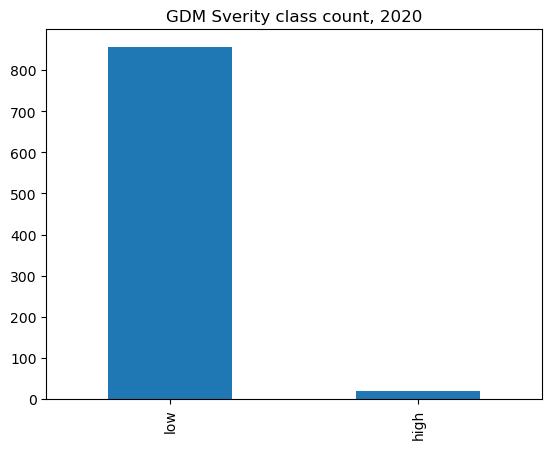

In [9]:
# Visualize data imbalance

target_count = vis_2020.severity_class.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='GDM Sverity class count, 2020');

Low disease: 668
High disease: 208
Proportion: 3.21 : 1


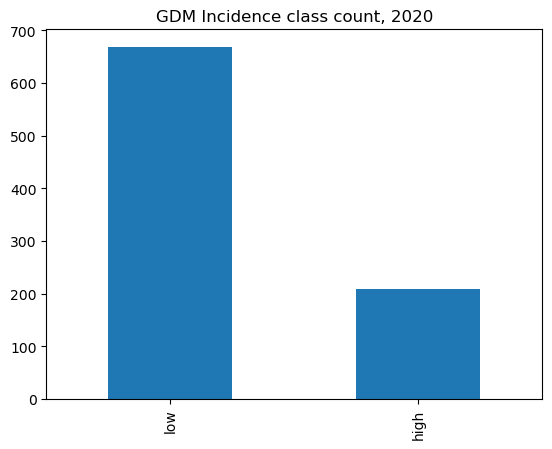

In [10]:
# Visualize data imbalance

target_count = vis_2020.inc_class.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='GDM Incidence class count, 2020');

In [11]:
vis_2020.columns

Index(['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
       'total_dis_sev', 'dm_sev', 'dm_inc', 'pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gri', 'arvi', 'cblue_blue',
       'greenI_cblue', 'green_cblue', 'yellow_cblue', 'cblue_red',
       'rede_cblue', 'nir_cblue', 'greenI_blue', 'green_blue', 'yellow_blue',
       'blue_red', 'rede_blue', 'nir_blue', 'greenI_yellow', 'greenI_red',
       'rede_greenI', 'nir_greenI', 'green_yellow', 'green_red', 'rede_green',
       'nir_green', 'yellow_red', 'rede_yellow', 'nir_yellow', 'rede_red',
       'inc_class', 'severity_class'],
      dtype='object')

In [13]:
corr_cols = ['dm_sev', 'pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gri', 'arvi', 'cblue_blue',
       'greenI_cblue', 'green_cblue', 'yellow_cblue', 'cblue_red',
       'rede_cblue', 'nir_cblue', 'greenI_blue', 'green_blue', 'yellow_blue',
       'blue_red', 'rede_blue', 'nir_blue', 'greenI_yellow', 'greenI_red',
       'rede_greenI', 'nir_greenI', 'green_yellow', 'green_red', 'rede_green',
       'nir_green', 'yellow_red', 'rede_yellow', 'nir_yellow', 'rede_red']
filtered = vis_2020[corr_cols]
correlations = filtered.corr()

correlations['dm_sev'].sort_values()

greenI_blue     -0.553091
rede_blue       -0.522728
green_blue      -0.518775
cblue_blue      -0.484142
yellow_blue     -0.437313
rede_green      -0.403471
rede_greenI     -0.153756
cblue_red       -0.095567
yellow_red      -0.075141
rede_red         0.015660
nir_blue         0.017184
yellow_cblue     0.040929
rede_yellow      0.079529
rede_cblue       0.099111
greenI_red       0.175747
greenI_yellow    0.185698
greenI_cblue     0.196053
tcari            0.237299
green_yellow     0.289851
green_cblue      0.317182
nir_green        0.328729
nir_cblue        0.343437
nir_greenI       0.385050
green_red        0.386195
gri              0.387289
pri              0.395272
nir_yellow       0.399164
ndvi             0.412617
msr              0.452258
savi             0.452756
sr               0.468477
arvi             0.502207
evi              0.504130
ndre             0.517205
clre             0.538599
blue_red         0.570330
dm_sev           1.000000
Name: dm_sev, dtype: float64

In [14]:
# Repeat above for 2021
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']


dis_ras_21 = glob.glob('../data/images/2021/PScope/dis_band_*/*.tif')
dis_ras_21

dfs_2021 = [img_to_df(dis_ras_21[i], cols) for i in np.arange(len(dis_ras_21))]
df_2021 = pd.concat(dfs_2021)
df_2021.head()

df_2021['total_dis_sev'] = df_2021['total_dis_sev']*10000
df_2021['dm_sev'] = df_2021['dm_sev']*10000
df_2021['dm_inc'] = df_2021['dm_inc']*10000

vis_2021 = add_vis(df_2021)
vis_2021.head()

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,rede_greenI,nir_greenI,green_yellow,green_red,rede_green,nir_green,yellow_red,rede_yellow,nir_yellow,rede_red
129,0.0609,0.0466,0.0783,0.0624,0.0731,0.0515,0.1000,0.3672,2.188161,1.212904,...,0.121705,0.648485,-0.078967,0.095698,0.231527,0.709497,0.173355,0.155402,0.667954,0.320132
130,0.0600,0.0464,0.0787,0.0629,0.0705,0.0511,0.0996,0.3646,1.360681,0.092944,...,0.117218,0.644936,-0.056972,0.103509,0.225846,0.705731,0.159539,0.171076,0.675937,0.321831
131,0.0609,0.0467,0.0784,0.0640,0.0691,0.0501,0.1033,0.3634,2.704999,-0.059974,...,0.137039,0.645088,-0.038317,0.121823,0.234907,0.700515,0.159396,0.198376,0.680462,0.346806
132,0.0611,0.0473,0.0781,0.0643,0.0730,0.0487,0.1064,0.3629,3.791102,-0.142349,...,0.153388,0.645805,-0.063365,0.138053,0.246632,0.698970,0.199671,0.186176,0.665061,0.372018
171,0.0607,0.0469,0.0781,0.0643,0.0750,0.0504,0.1049,0.3618,3.417164,2.584481,...,0.146448,0.644919,-0.076813,0.121186,0.239953,0.698193,0.196172,0.166203,0.656593,0.350934


In [15]:
vis_2021['inc_class'] = 'low'
vis_2021.loc[vis_2021['dm_inc']>25,'inc_class']= 'high'
    
vis_2021['severity_class'] = 'low'
vis_2021.loc[vis_2021['dm_sev']>10,'severity_class']= 'high'
vis_2021

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,green_yellow,green_red,rede_green,nir_green,yellow_red,rede_yellow,nir_yellow,rede_red,inc_class,severity_class
129,0.0609,0.0466,0.0783,0.0624,0.0731,0.0515,0.1000,0.3672,2.188161,1.212904,...,-0.078967,0.095698,0.231527,0.709497,0.173355,0.155402,0.667954,0.320132,low,low
130,0.0600,0.0464,0.0787,0.0629,0.0705,0.0511,0.0996,0.3646,1.360681,0.092944,...,-0.056972,0.103509,0.225846,0.705731,0.159539,0.171076,0.675937,0.321831,low,low
131,0.0609,0.0467,0.0784,0.0640,0.0691,0.0501,0.1033,0.3634,2.704999,-0.059974,...,-0.038317,0.121823,0.234907,0.700515,0.159396,0.198376,0.680462,0.346806,low,low
132,0.0611,0.0473,0.0781,0.0643,0.0730,0.0487,0.1064,0.3629,3.791102,-0.142349,...,-0.063365,0.138053,0.246632,0.698970,0.199671,0.186176,0.665061,0.372018,low,low
171,0.0607,0.0469,0.0781,0.0643,0.0750,0.0504,0.1049,0.3618,3.417164,2.584481,...,-0.076813,0.121186,0.239953,0.698193,0.196172,0.166203,0.656593,0.350934,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.0301,0.0458,0.0647,0.0715,0.0671,0.0590,0.1189,0.3795,0.018694,-0.000427,...,0.031746,0.095785,0.248950,0.682927,0.064235,0.278495,0.699507,0.336706,low,low
1213,0.0308,0.0469,0.0645,0.0722,0.0664,0.0592,0.1195,0.3798,0.036922,0.000658,...,0.041847,0.098935,0.246740,0.680531,0.057325,0.285637,0.702376,0.337437,low,low
1214,0.0301,0.0472,0.0679,0.0747,0.0690,0.0610,0.1200,0.3797,0.059690,0.003492,...,0.039666,0.100958,0.232666,0.671215,0.061538,0.269841,0.692445,0.325967,low,low
1255,0.0352,0.0455,0.0674,0.0743,0.0671,0.0593,0.1246,0.3845,0.096417,0.000029,...,0.050919,0.112275,0.252891,0.676112,0.061709,0.299948,0.702834,0.355084,low,low


In [16]:
corr_cols = ['dm_sev', 'pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gri', 'arvi', 'cblue_blue',
       'greenI_cblue', 'green_cblue', 'yellow_cblue', 'cblue_red',
       'rede_cblue', 'nir_cblue', 'greenI_blue', 'green_blue', 'yellow_blue',
       'blue_red', 'rede_blue', 'nir_blue', 'greenI_yellow', 'greenI_red',
       'rede_greenI', 'nir_greenI', 'green_yellow', 'green_red', 'rede_green',
       'nir_green', 'yellow_red', 'rede_yellow', 'nir_yellow', 'rede_red']
filtered_21 = vis_2021[corr_cols]
correlations_21 = filtered_21.corr()

correlations_21['dm_sev'].sort_values()

nir_greenI      -0.247566
ndvi            -0.243328
rede_red        -0.238860
msr             -0.234074
nir_blue        -0.233249
sr              -0.227907
green_red       -0.226875
nir_cblue       -0.220469
gri             -0.219975
savi            -0.214141
nir_yellow      -0.208555
arvi            -0.204048
greenI_cblue    -0.197786
rede_yellow     -0.196595
rede_cblue      -0.194665
evi             -0.194294
nir_green       -0.193737
green_cblue     -0.191573
green_yellow    -0.184972
yellow_cblue    -0.180870
clre            -0.176614
ndre            -0.176379
tcari           -0.175586
rede_greenI     -0.163240
rede_green      -0.147656
pri             -0.133671
rede_blue       -0.128352
green_blue      -0.090484
greenI_yellow   -0.050883
blue_red        -0.046714
greenI_red      -0.012158
yellow_red       0.048012
greenI_blue      0.079903
yellow_blue      0.079942
cblue_red        0.159811
cblue_blue       0.195301
dm_sev           1.000000
Name: dm_sev, dtype: float64

In [18]:
# Repeat above for 2022
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']


dis_ras_22 = glob.glob('../data/images/2022/PScope/dis_band_*/*.tif')
dis_ras_22

dfs_2022 = [img_to_df(dis_ras_22[i], cols) for i in np.arange(len(dis_ras_22))]
df_2022 = pd.concat(dfs_2022)
df_2022.head()

df_2022['total_dis_sev'] = df_2022['total_dis_sev']*10000
df_2022['dm_sev'] = df_2022['dm_sev']*10000
df_2022['dm_inc'] = df_2022['dm_inc']*10000

vis_2022 = add_vis(df_2022)
vis_2022.head()

vis_2022['inc_class'] = 'low'
vis_2022.loc[vis_2022['dm_inc']>25,'inc_class']= 'high'
    
vis_2022['severity_class'] = 'low'
vis_2022.loc[vis_2022['dm_sev']>10,'severity_class']= 'high'
vis_2022

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,green_yellow,green_red,rede_green,nir_green,yellow_red,rede_yellow,nir_yellow,rede_red,inc_class,severity_class
129,0.0329,0.0414,0.0641,0.0801,0.0662,0.0590,0.1370,0.4340,2.726730,0.341228,...,0.095010,0.151689,0.262091,0.688388,0.057508,0.348425,0.735306,0.397959,low,low
130,0.0335,0.0412,0.0632,0.0784,0.0638,0.0569,0.1325,0.4297,5.666480,-0.550687,...,0.102672,0.158906,0.256520,0.691399,0.057167,0.349974,0.741439,0.399155,low,low
131,0.0371,0.0397,0.0614,0.0775,0.0618,0.0563,0.1330,0.4260,8.587904,-0.573253,...,0.112706,0.158445,0.263658,0.692155,0.046571,0.365503,0.746617,0.405177,low,low
132,0.0373,0.0364,0.0608,0.0731,0.0616,0.0556,0.1309,0.4262,11.296051,-0.401819,...,0.085375,0.135975,0.283333,0.707190,0.051195,0.360000,0.747437,0.403753,low,low
171,0.0373,0.0423,0.0635,0.0781,0.0664,0.0592,0.1355,0.4311,3.467120,0.518043,...,0.080969,0.137655,0.268727,0.693244,0.057325,0.342249,0.733065,0.391885,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.0505,0.0536,0.0819,0.0931,0.0927,0.0845,0.1604,0.4003,1.698145,-0.003627,...,0.002153,0.048423,0.265483,0.622619,0.046275,0.267483,0.623935,0.309922,low,low
1213,0.0535,0.0528,0.0799,0.0937,0.0937,0.0851,0.1571,0.4006,2.197155,-0.002324,...,0.000000,0.048098,0.252791,0.620878,0.048098,0.252791,0.620878,0.297275,low,low
1214,0.0481,0.0566,0.0848,0.0938,0.0905,0.0863,0.1530,0.3982,2.403586,-0.000604,...,0.017906,0.041644,0.239870,0.618699,0.023756,0.256674,0.629630,0.278730,low,low
1255,0.0515,0.0536,0.0829,0.0940,0.0938,0.0838,0.1580,0.4022,1.120020,0.000186,...,0.001065,0.057368,0.253968,0.621121,0.056306,0.254964,0.621774,0.306865,low,low


In [19]:
corr_cols = ['dm_sev', 'pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gri', 'arvi', 'cblue_blue',
       'greenI_cblue', 'green_cblue', 'yellow_cblue', 'cblue_red',
       'rede_cblue', 'nir_cblue', 'greenI_blue', 'green_blue', 'yellow_blue',
       'blue_red', 'rede_blue', 'nir_blue', 'greenI_yellow', 'greenI_red',
       'rede_greenI', 'nir_greenI', 'green_yellow', 'green_red', 'rede_green',
       'nir_green', 'yellow_red', 'rede_yellow', 'nir_yellow', 'rede_red']
filtered_22 = vis_2022[corr_cols]
correlations_22 = filtered_22.corr()

correlations_22['dm_sev'].sort_values()

pri             -0.129707
yellow_cblue    -0.097803
rede_greenI     -0.089036
yellow_blue     -0.065356
green_cblue     -0.000828
rede_cblue       0.033492
rede_green       0.058203
cblue_blue       0.066041
greenI_cblue     0.078910
green_blue       0.100487
rede_blue        0.145605
yellow_red       0.150701
cblue_red        0.159996
green_yellow     0.171337
rede_yellow      0.174504
blue_red         0.180528
rede_red         0.210213
greenI_blue      0.215154
tcari            0.223464
green_red        0.225850
gri              0.229627
greenI_red       0.263860
nir_cblue        0.268357
greenI_yellow    0.270565
nir_greenI       0.285930
arvi             0.286725
ndvi             0.295407
nir_yellow       0.305008
nir_green        0.310703
nir_blue         0.312861
msr              0.318265
sr               0.329974
ndre             0.335947
evi              0.342000
savi             0.342971
clre             0.354191
dm_sev           1.000000
Name: dm_sev, dtype: float64

In [21]:
# Check with Mann-Whitney U

from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)


In [36]:
vis_common = ['rede_blue', 'rede_greenI', 'rede_green']

for vi in vis_common:
    years=[vis_2020,vis_2021,vis_2022]
    for y in years:
        low_inc = y[y['inc_class']=='low'][vi]
        high_inc = y[y['inc_class']=='high'][vi]
        print('\n{} incidence test:'.format(vi))
        mw_result_inc= mann_whitney_u_test(low_inc, high_inc)
        
        print('\n{} severity test'.format(vi))
        low_sev = y[y['severity_class']=='low'][vi]
        high_sev = y[y['severity_class']=='high'][vi]
        mw_result_sev = mann_whitney_u_test(low_sev, high_sev)

        


rede_blue incidence test:
Mann-Whitney U: 126664.5 p-value: 5.011409881576166e-72

rede_blue severity test
Mann-Whitney U: 14622.5 p-value: 5.978387276005713e-08

rede_blue incidence test:
Mann-Whitney U: 511812.5 p-value: 1.196701771571713e-28

rede_blue severity test
Mann-Whitney U: 261583.0 p-value: 3.8650642159966134e-08

rede_blue incidence test:
Mann-Whitney U: 277522.5 p-value: 0.7130719799326282

rede_blue severity test
Mann-Whitney U: 153165.0 p-value: 2.322092036359919e-15

rede_greenI incidence test:
Mann-Whitney U: 94551.0 p-value: 3.5475495059630804e-15

rede_greenI severity test
Mann-Whitney U: 10743.0 p-value: 0.0510378289636853

rede_greenI incidence test:
Mann-Whitney U: 698227.0 p-value: 0.8537870307630585

rede_greenI severity test
Mann-Whitney U: 285913.5 p-value: 5.482544304163126e-16

rede_greenI incidence test:
Mann-Whitney U: 296208.0 p-value: 0.23947793723349708

rede_greenI severity test
Mann-Whitney U: 287363.5 p-value: 5.161814651214299e-05

rede_green inci

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1161/3851252778.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,10)


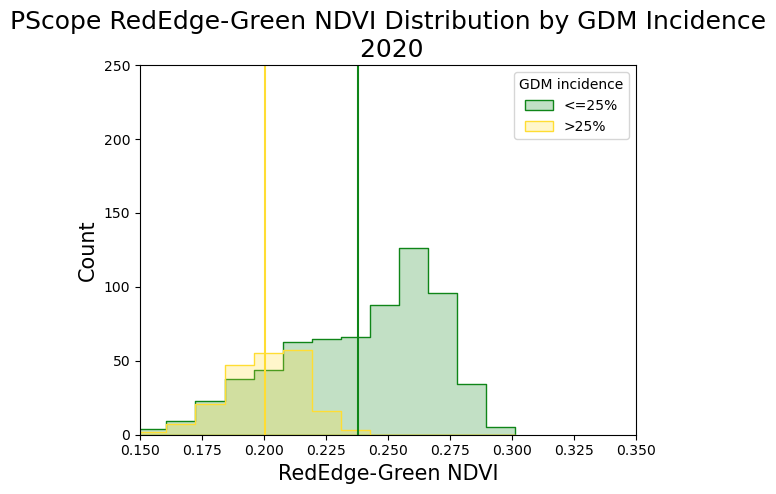

In [59]:
# Rede_green is negatively correlated with disease severity across all years.
# Try plotting

# Plot distributions for 2020 incidence
colors = [ "#FFDD33", "#0F8518"]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="rede_green", hue="inc_class", element='step')

plt.xlabel('RedEdge-Green NDVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.15, 0.35)
plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['<=25%', '>25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='high'].rede_green.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='low'].rede_green.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope RedEdge-Green NDVI Distribution by GDM Incidence\n 2020', fontsize=18)
#plt.savefig("regr20_inc.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1161/151647591.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,10)


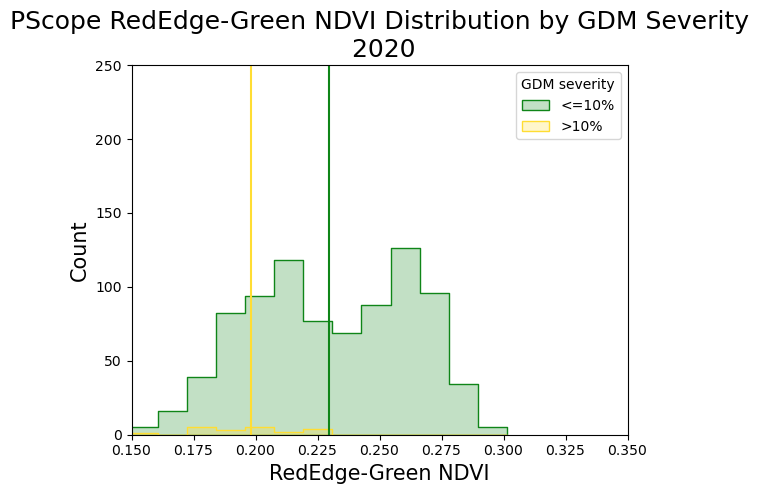

In [60]:
# Rede_green is negatively correlated with disease severity across all years.
# Try plotting

# Plot distributions for 2020 severity
colors = [ "#FFDD33", "#0F8518"]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="rede_green", hue="severity_class", element='step')

plt.xlabel('RedEdge-Green NDVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.15, 0.35)
plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['<=10%', '>10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='high'].rede_green.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='low'].rede_green.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope RedEdge-Green NDVI Distribution by GDM Severity\n 2020', fontsize=18)
#plt.savefig("regr20_sev.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1161/105990952.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,10)


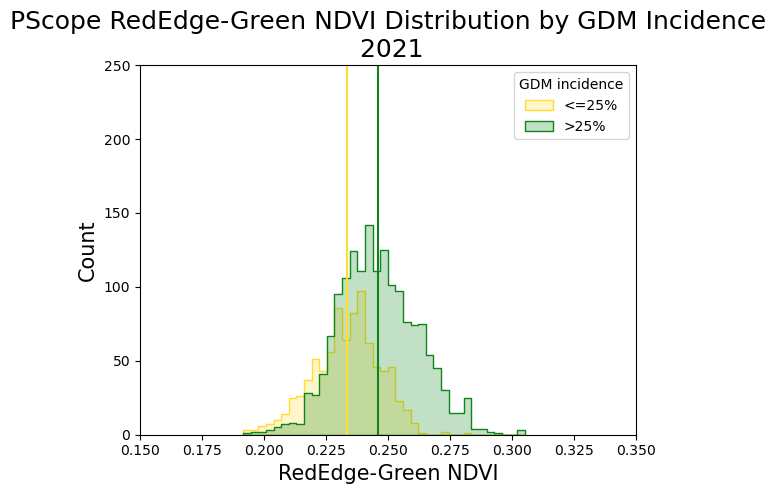

In [61]:
# Rede_green is negatively correlated with disease across all years.
# Try plotting

# Plot distributions for 2021 incidence
colors = [  "#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="rede_green", hue="inc_class", element='step')

plt.xlabel('RedEdge-Green NDVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.15, 0.35)
plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['<=25%', '>25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='high'].rede_green.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].rede_green.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope RedEdge-Green NDVI Distribution by GDM Incidence\n 2021', fontsize=18)
#plt.savefig("regr21_inc.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1161/1616344217.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,10)


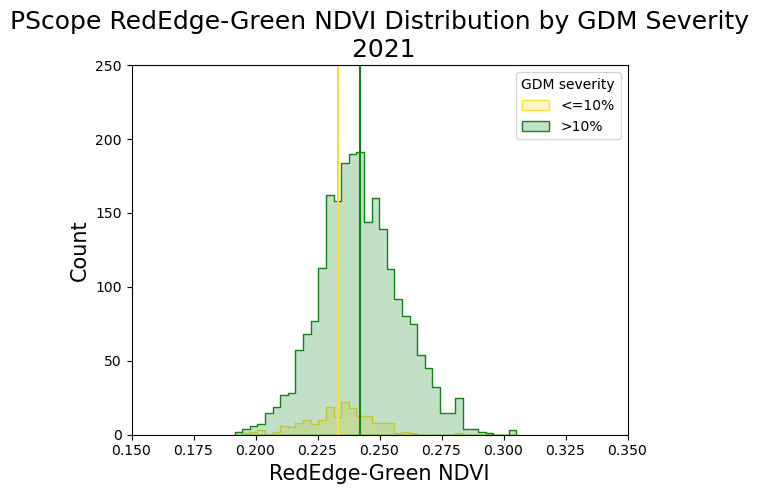

In [62]:
# Rede_green is negatively correlated with disease severity across all years.
# Try plotting

# Plot distributions for 2021 severity
colors = [ "#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="rede_green", hue="severity_class", element='step')

plt.xlabel('RedEdge-Green NDVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.15, 0.35)
plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['<=10%', '>10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='high'].rede_green.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='low'].rede_green.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope RedEdge-Green NDVI Distribution by GDM Severity\n 2021', fontsize=18)
#plt.savefig("regr21_sev.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1161/928350135.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,10)


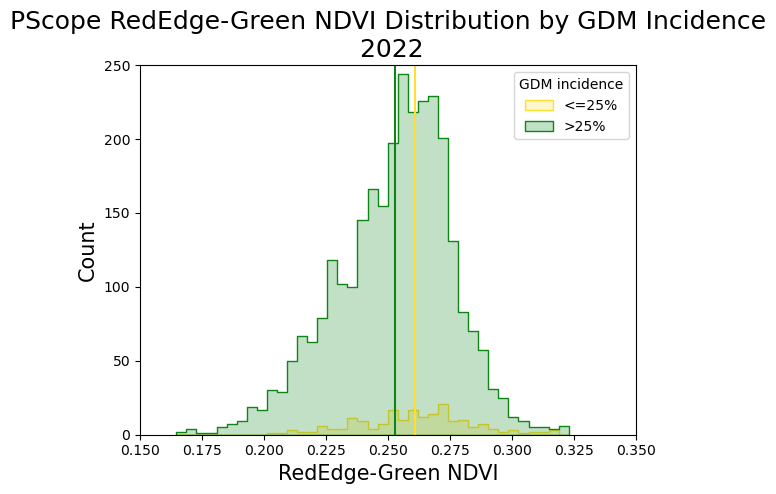

In [63]:
# Rede_green is negatively correlated with disease across all years.
# Try plotting

# Plot distributions for 2022 incidence
colors = [ "#0F8518", "#FFDD33",]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="rede_green", hue="inc_class", element='step')

plt.xlabel('RedEdge-Green NDVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.15, 0.35)
plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['<=25%', '>25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='high'].rede_green.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='low'].rede_green.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope RedEdge-Green NDVI Distribution by GDM Incidence\n 2022', fontsize=18)
#plt.savefig("regr22_inc.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1161/1894159157.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,10)


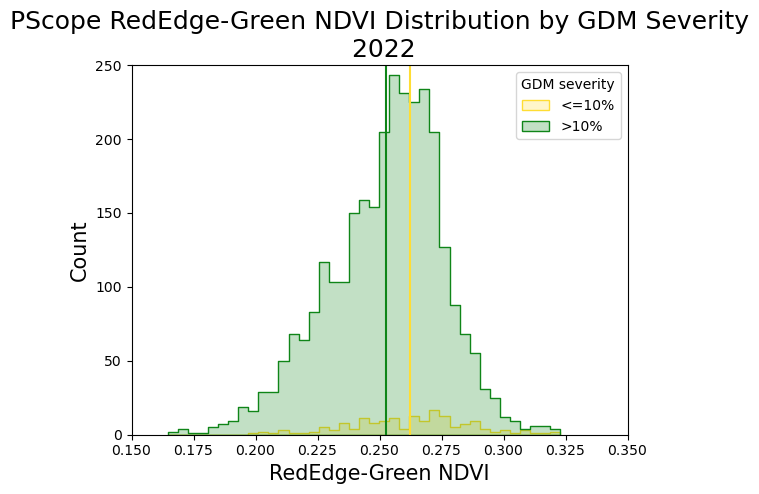

In [65]:
# Rede_green is negatively correlated with disease severity across all years.
# Try plotting

# Plot distributions for 2022 severity
colors = [ "#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="rede_green", hue="severity_class", element='step')

plt.xlabel('RedEdge-Green NDVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.15, 0.35)
plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['<=10%', '>10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='high'].rede_green.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='low'].rede_green.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope RedEdge-Green NDVI Distribution by GDM Severity\n 2022', fontsize=18)
#plt.savefig("regr22_sev.svg")
plt.show()

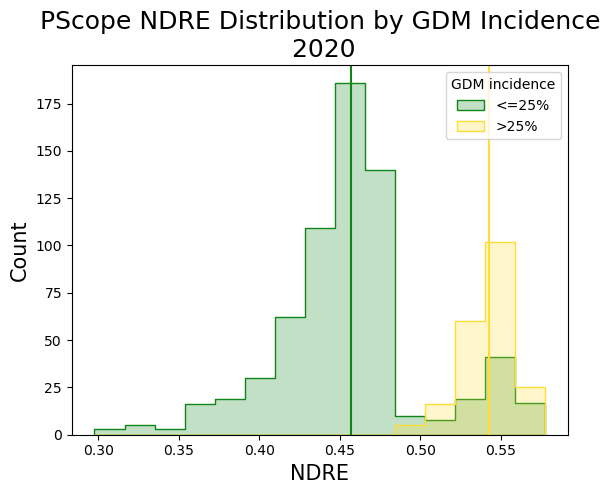

In [103]:
# Repeat with NDRE

# Plot distributions for 2020 incidence
colors = [ "#FFDD33", "#0F8518"]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="ndre", hue="inc_class", element='step')

plt.xlabel('NDRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['<=25%', '>25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='high'].ndre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='low'].ndre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope NDRE Distribution by GDM Incidence\n 2020', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

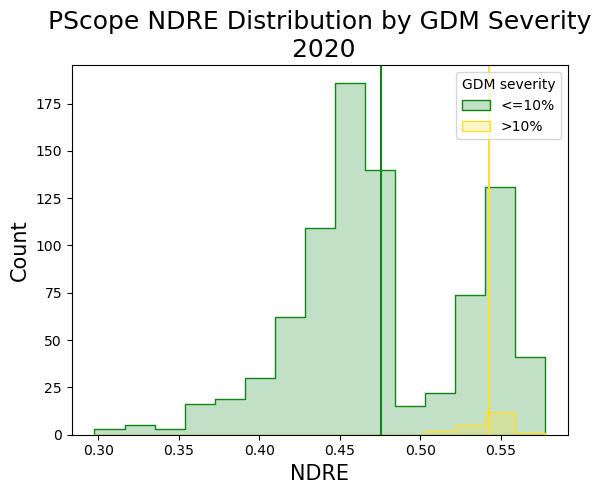

In [104]:

# Plot distributions for 2020 severity
colors = [ "#FFDD33", "#0F8518"]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="ndre", hue="severity_class", element='step')

plt.xlabel('NDRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['<=10%', '>10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='high'].ndre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='low'].ndre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope NDRE Distribution by GDM Severity\n 2020', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

In [105]:
# Check with Mann-Whitney U

from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)


In [106]:
#EVI
evi_lowinc = vis_2020[vis_2020['inc_class']=='low']['evi']
evi_highinc = vis_2020[vis_2020['inc_class']=='high']['evi']
mann_whitney_u_test(evi_lowinc, evi_highinc)

Mann-Whitney U: 12161.0 p-value: 2.564052461613881e-72


In [107]:
#NDRE

ndre_lowinc = vis_2020[vis_2020['inc_class']=='low']['ndre']
ndre_highinc = vis_2020[vis_2020['inc_class']=='high']['ndre']
mann_whitney_u_test(ndre_lowinc, ndre_highinc)

Mann-Whitney U: 10056.5 p-value: 1.3813764450712987e-77


In [108]:
def mw_u(veg_inds, df, var_name):
    u_stats = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        u, p = stats.mannwhitneyu(df[df[var_name]=='low'][vi], df[df[var_name]=='high'][vi])
        u_stats.append(u)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'mann-whitneyU':u_stats, 'p_value':p_vals}
        mwu_df = pd.DataFrame(dictionary).sort_values(by='mann-whitneyU')
        
    return mwu_df

In [109]:
veg_inds = ['pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gri', 'arvi', 'cblue_blue',
       'cblue_greenI', 'cblue_green', 'cblue_yellow', 'cblue_red',
       'cblue_rede', 'nir_cblue', 'blue_greenI', 'blue_green', 'blue_yellow',
       'blue_red', 'blue_rede', 'nir_blue', 'greenI_yellow', 'greenI_red',
       'greenI_rede', 'nir_greenI', 'green_yellow', 'green_red', 'green_rede',
       'nir_green', 'yellow_red', 'yellow_rede', 'nir_yellow', 'red_rede']
mw_u(veg_inds,vis_2020, 'inc_class')

,vi,mann-whitneyU,p_value
19,blue_green,9534.5,6.371255e-79
1,clre,10056.5,1.381372e-77
2,ndre,10056.5,1.381376e-77
18,blue_greenI,10467.0,1.523313e-76
21,blue_red,10729.5,7.009665e-76
10,arvi,11793.0,3.171481e-73
6,savi,11887.0,5.415756e-73
5,evi,12161.0,2.564052e-72
22,blue_rede,12279.5,5.011410e-72
8,msr,12418.0,1.094919e-71


In [110]:
mw_u(veg_inds,vis_2020, 'severity_class')

,vi,mann-whitneyU,p_value
18,blue_greenI,2154.5,1.027715e-08
21,blue_red,2195.0,1.271270e-08
19,blue_green,2352.0,2.864479e-08
22,blue_rede,2497.5,5.978387e-08
10,arvi,2867.0,3.597445e-07
1,clre,2875.0,3.735604e-07
2,ndre,2875.0,3.735605e-07
20,blue_yellow,2951.0,5.330552e-07
5,evi,3017.0,7.232609e-07
27,nir_greenI,3040.0,8.037718e-07


In [111]:
cols

['c_blue',
 'blue',
 'greenI',
 'green',
 'yellow',
 'red',
 'rede',
 'nir',
 'total_dis_sev',
 'dm_sev',
 'dm_inc']

In [112]:
# Repeat above for 2021
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']


dis_ras_21 = glob.glob('../data/images/2021/PScope/dis_band_*/*.tif')
dis_ras_21

dfs_2021 = [img_to_df(dis_ras_21[i], cols) for i in np.arange(len(dis_ras_21))]
df_2021 = pd.concat(dfs_2021)
df_2021.head()

df_2021['total_dis_sev'] = df_2021['total_dis_sev']*10000
df_2021['dm_sev'] = df_2021['dm_sev']*10000
df_2021['dm_inc'] = df_2021['dm_inc']*10000

vis_2021 = add_vis(df_2021)
vis_2021.head()



,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,greenI_rede,nir_greenI,green_yellow,green_red,green_rede,nir_green,yellow_red,yellow_rede,nir_yellow,red_rede
129,0.0609,0.0466,0.0783,0.0624,0.0731,0.0515,0.1000,0.3672,2.188161,1.212904,...,-0.121705,0.648485,-0.078967,0.095698,-0.231527,0.709497,0.173355,-0.155402,0.667954,0.320132
130,0.0600,0.0464,0.0787,0.0629,0.0705,0.0511,0.0996,0.3646,1.360681,0.092944,...,-0.117218,0.644936,-0.056972,0.103509,-0.225846,0.705731,0.159539,-0.171076,0.675937,0.321831
131,0.0609,0.0467,0.0784,0.0640,0.0691,0.0501,0.1033,0.3634,2.704999,-0.059974,...,-0.137039,0.645088,-0.038317,0.121823,-0.234907,0.700515,0.159396,-0.198376,0.680462,0.346806
132,0.0611,0.0473,0.0781,0.0643,0.0730,0.0487,0.1064,0.3629,3.791102,-0.142349,...,-0.153388,0.645805,-0.063365,0.138053,-0.246632,0.698970,0.199671,-0.186176,0.665061,0.372018
171,0.0607,0.0469,0.0781,0.0643,0.0750,0.0504,0.1049,0.3618,3.417164,2.584481,...,-0.146448,0.644919,-0.076813,0.121186,-0.239953,0.698193,0.196172,-0.166203,0.656593,0.350934


In [113]:
vis_2021['inc_class'] = 'low'
vis_2021.loc[vis_2021['dm_inc']>25,'inc_class']= 'high'
    
vis_2021['severity_class'] = 'low'
vis_2021.loc[vis_2021['dm_sev']>10,'severity_class']= 'high'
vis_2021

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,green_yellow,green_red,green_rede,nir_green,yellow_red,yellow_rede,nir_yellow,red_rede,inc_class,severity_class
129,0.0609,0.0466,0.0783,0.0624,0.0731,0.0515,0.1000,0.3672,2.188161,1.212904,...,-0.078967,0.095698,-0.231527,0.709497,0.173355,-0.155402,0.667954,0.320132,low,low
130,0.0600,0.0464,0.0787,0.0629,0.0705,0.0511,0.0996,0.3646,1.360681,0.092944,...,-0.056972,0.103509,-0.225846,0.705731,0.159539,-0.171076,0.675937,0.321831,low,low
131,0.0609,0.0467,0.0784,0.0640,0.0691,0.0501,0.1033,0.3634,2.704999,-0.059974,...,-0.038317,0.121823,-0.234907,0.700515,0.159396,-0.198376,0.680462,0.346806,low,low
132,0.0611,0.0473,0.0781,0.0643,0.0730,0.0487,0.1064,0.3629,3.791102,-0.142349,...,-0.063365,0.138053,-0.246632,0.698970,0.199671,-0.186176,0.665061,0.372018,low,low
171,0.0607,0.0469,0.0781,0.0643,0.0750,0.0504,0.1049,0.3618,3.417164,2.584481,...,-0.076813,0.121186,-0.239953,0.698193,0.196172,-0.166203,0.656593,0.350934,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0.0301,0.0458,0.0647,0.0715,0.0671,0.0590,0.1189,0.3795,0.018694,-0.000427,...,0.031746,0.095785,-0.248950,0.682927,0.064235,-0.278495,0.699507,0.336706,low,low
1213,0.0308,0.0469,0.0645,0.0722,0.0664,0.0592,0.1195,0.3798,0.036922,0.000658,...,0.041847,0.098935,-0.246740,0.680531,0.057325,-0.285637,0.702376,0.337437,low,low
1214,0.0301,0.0472,0.0679,0.0747,0.0690,0.0610,0.1200,0.3797,0.059690,0.003492,...,0.039666,0.100958,-0.232666,0.671215,0.061538,-0.269841,0.692445,0.325967,low,low
1255,0.0352,0.0455,0.0674,0.0743,0.0671,0.0593,0.1246,0.3845,0.096417,0.000029,...,0.050919,0.112275,-0.252891,0.676112,0.061709,-0.299948,0.702834,0.355084,low,low


In [114]:
mw_u(veg_inds,vis_2021, 'inc_class')

,vi,mann-whitneyU,p_value
33,yellow_rede,334025.0,1.038752e-102
32,yellow_red,356944.5,1.585407e-90
11,cblue_blue,379722.5,3.426127e-79
12,cblue_greenI,391275.0,9.745456e-74
30,green_rede,393524.5,1.065941e-72
13,cblue_green,406694.5,9.108447e-67
16,cblue_rede,406948.0,1.177863e-66
15,cblue_red,417741.0,5.445855e-62
0,pri,485575.0,1.251776e-36
14,cblue_yellow,519554.0,1.730159e-26


In [115]:
mw_u(veg_inds,vis_2021, 'severity_class')


,vi,mann-whitneyU,p_value
16,cblue_rede,130290.5,1.215913e-17
12,cblue_greenI,131902.0,5.338810e-17
14,cblue_yellow,133238.5,1.781032e-16
13,cblue_green,133291.5,1.867411e-16
26,greenI_rede,134506.5,5.482544e-16
33,yellow_rede,135502.0,1.308666e-15
11,cblue_blue,135834.5,1.745600e-15
15,cblue_red,140783.0,1.096664e-13
30,green_rede,148174.0,3.182693e-11
22,blue_rede,158837.0,3.865064e-08


In [140]:
#Get correlation coefficients for all VIs
corr_cols = ['dm_sev', 'pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gri', 'arvi', 'cblue_blue',
       'cblue_greenI', 'cblue_green', 'cblue_yellow', 'cblue_red',
       'cblue_rede', 'nir_cblue', 'blue_greenI', 'blue_green', 'blue_yellow',
       'blue_red', 'blue_rede', 'nir_blue', 'greenI_yellow', 'greenI_red',
       'greenI_rede', 'nir_greenI', 'green_yellow', 'green_red', 'green_rede',
       'nir_green', 'yellow_red', 'yellow_rede', 'nir_yellow', 'red_rede']
filtered = vis_2021[corr_cols]
correlations = filtered.corr()

correlations['dm_sev'].sort_values()

nir_greenI      -0.247566
ndvi            -0.243328
red_rede        -0.238860
msr             -0.234074
nir_blue        -0.233249
sr              -0.227907
green_red       -0.226875
nir_cblue       -0.220469
gri             -0.219975
savi            -0.214141
nir_yellow      -0.208555
arvi            -0.204048
evi             -0.194294
nir_green       -0.193737
green_yellow    -0.184972
clre            -0.176614
ndre            -0.176379
tcari           -0.175586
pri             -0.133671
blue_yellow     -0.079942
blue_greenI     -0.079903
greenI_yellow   -0.050883
blue_red        -0.046714
greenI_red      -0.012158
yellow_red       0.048012
blue_green       0.090484
blue_rede        0.128352
green_rede       0.147656
cblue_red        0.159811
greenI_rede      0.163240
cblue_yellow     0.180870
cblue_green      0.191573
cblue_rede       0.194665
cblue_blue       0.195301
yellow_rede      0.196595
cblue_greenI     0.197786
dm_sev           1.000000
Name: dm_sev, dtype: float64

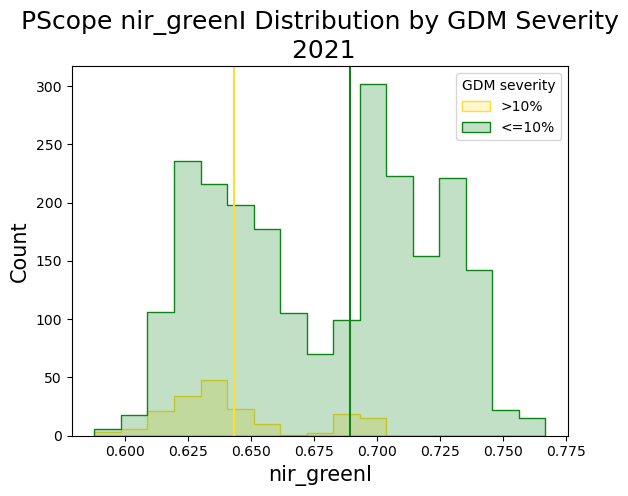

In [146]:
# Nir_greenI 2021

# Plot distributions for 2021 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="nir_greenI", hue="severity_class", element='step')

plt.xlabel('nir_greenI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='high'].nir_greenI.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].nir_greenI.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope nir_greenI Distribution by GDM Severity\n 2021', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

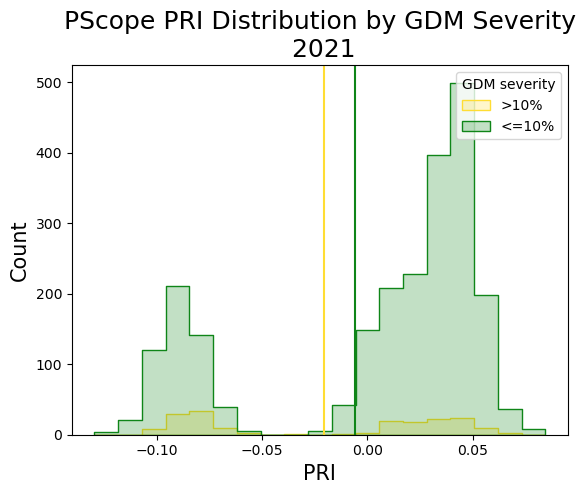

In [117]:
# Repeat with pri 2021

# Plot distributions for 2021 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="pri", hue="severity_class", element='step')

plt.xlabel('PRI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='high'].pri.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].pri.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope PRI Distribution by GDM Severity\n 2021', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

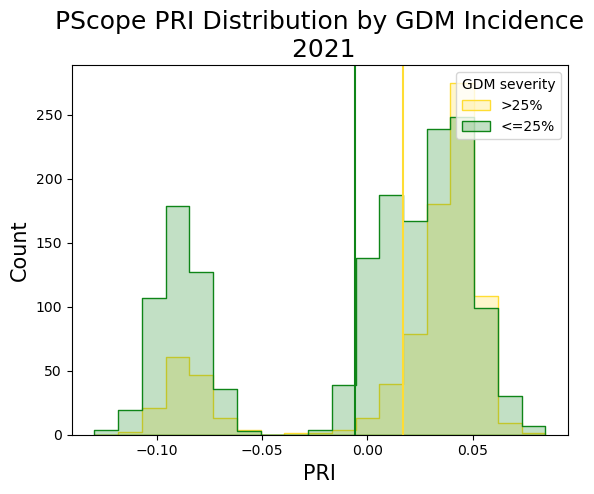

In [144]:
# Repeat with pri 2021

# Plot distributions for 2021 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="pri", hue="inc_class", element='step')

plt.xlabel('PRI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='high'].pri.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].pri.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope PRI Distribution by GDM Incidence\n 2021', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

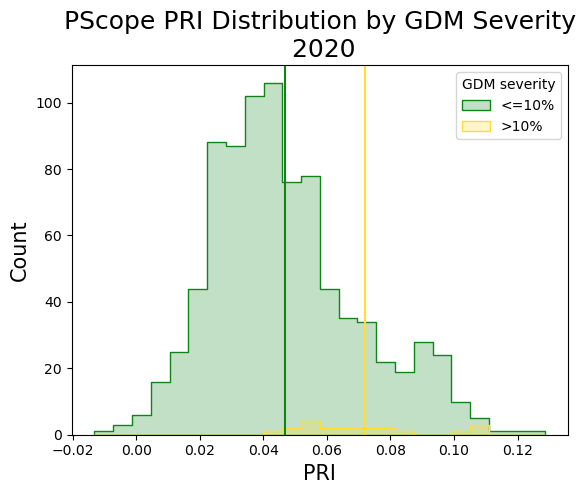

In [142]:
# Plot distributions for 2020 severity
colors = [ "#FFDD33", "#0F8518"]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="pri", hue="severity_class", element='step')

plt.xlabel('PRI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['<=10%', '>10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='high'].pri.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='low'].pri.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope PRI Distribution by GDM Severity\n 2020', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

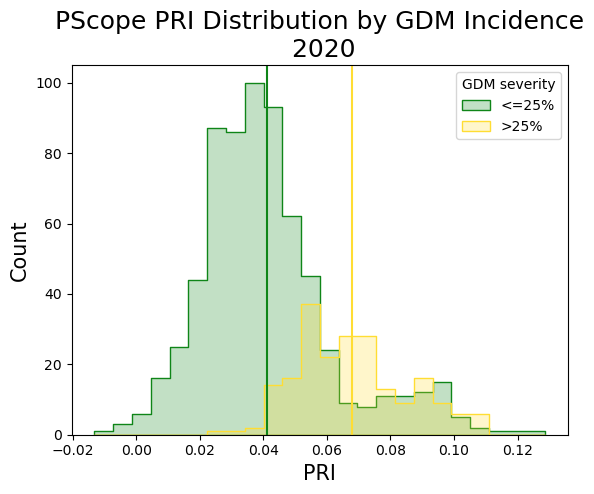

In [143]:
# Plot distributions for 2020 inc
colors = [ "#FFDD33", "#0F8518"]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="pri", hue="inc_class", element='step')

plt.xlabel('PRI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['<=25%', '>25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='high'].pri.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='low'].pri.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope PRI Distribution by GDM Incidence\n 2020', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

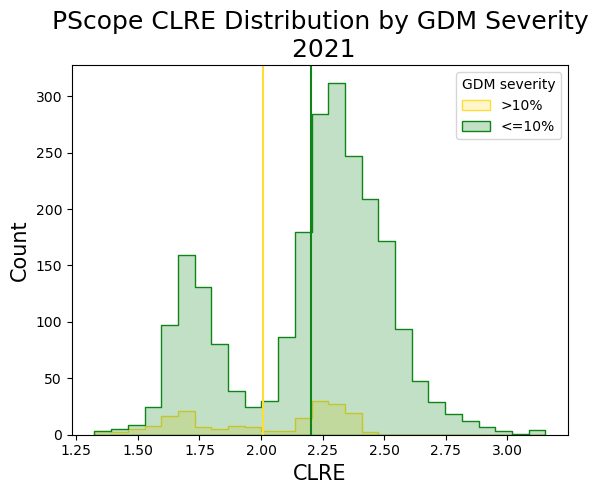

In [118]:
# Repeat with clre 2021

# Plot distributions for 2021 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="clre", hue="severity_class", element='step')

plt.xlabel('CLRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='high'].clre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='low'].clre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope CLRE Distribution by GDM Severity\n 2021', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

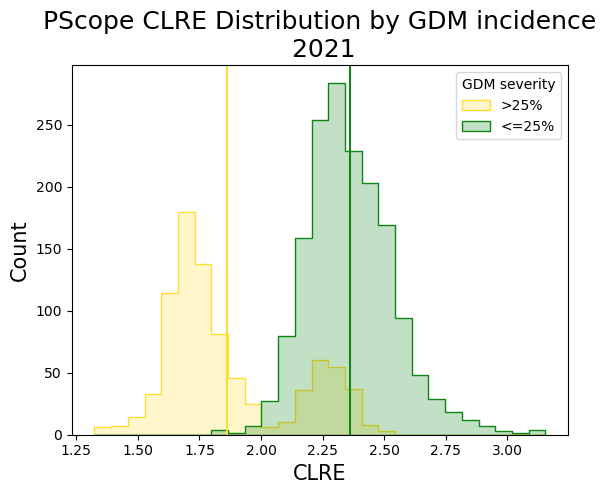

In [119]:
# Repeat with clre 2021

# Plot distributions for 2021 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="clre", hue="inc_class", element='step')

plt.xlabel('CLRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='high'].clre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].clre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope CLRE Distribution by GDM incidence\n 2021', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

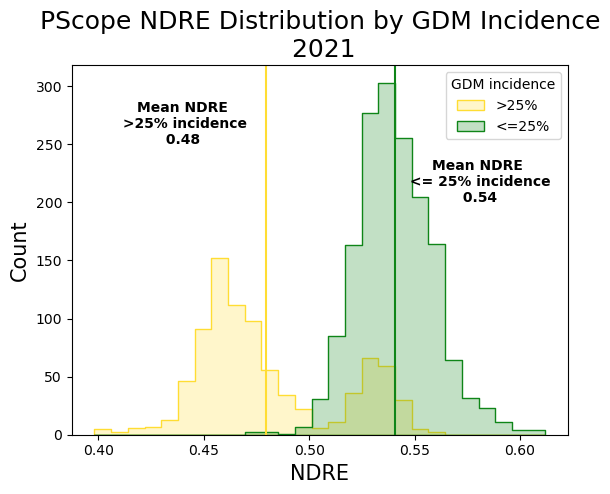

In [120]:
# Repeat with NDRE 2021

# Plot distributions for 2021 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="ndre", hue="inc_class", element='step')

plt.xlabel('NDRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
# plt.xlim(0.35, 0.80)
# plt.ylim(0, 350,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='high'].ndre.mean(),
            color="#FFDD33")
plt.text(0.44, 250, "Mean NDRE\n >25% incidence\n 0.48 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].ndre.mean(),
            color="#0F8518")

plt.text(0.58, 200, "Mean NDRE\n <= 25% incidence\n 0.54", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope NDRE Distribution by GDM Incidence\n 2021', fontsize=18)
#plt.savefig("giesco_ndre_21.svg")
plt.show()

In [121]:
vis_2021[vis_2021['inc_class']=='high'].ndre.mean()

0.47972083

In [122]:
vis_2021[vis_2021['inc_class']=='low'].ndre.mean()

0.54068124

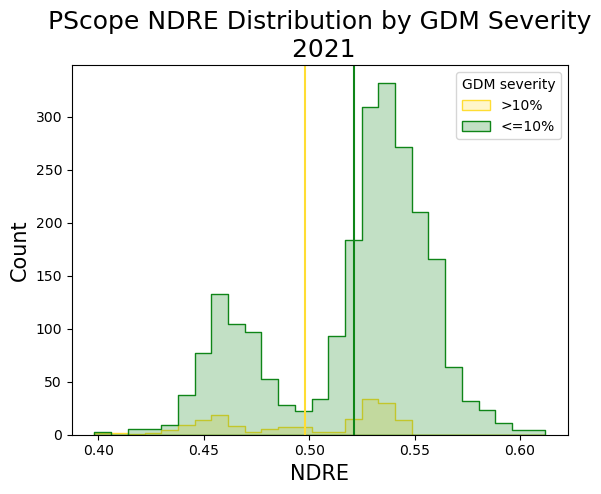

In [123]:
# Repeat with NDRE 2021

# Plot distributions for 2021 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="ndre", hue="severity_class", element='step')
plt.xlabel('NDRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])
# Add lines for mean EVI
#high disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='high'].ndre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')
#low disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='low'].ndre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope NDRE Distribution by GDM Severity\n 2021', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

In [152]:
print('2020\n')
print("High incidence EVI:", vis_2020[vis_2020['inc_class']=='high'].evi.mean())
print("Low incidence EVI:", vis_2020[vis_2020['inc_class']=='low'].evi.mean())


print("High severity EVI:", vis_2020[vis_2020['severity_class']=='high'].evi.mean())
print("Low severity EVI:", vis_2020[vis_2020['severity_class']=='low'].evi.mean())

2020

High incidence EVI: 0.65121746
Low incidence EVI: 0.4551551
High severity EVI: 0.65265626
Low severity EVI: 0.4981819


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_25927/328135861.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 350,10)


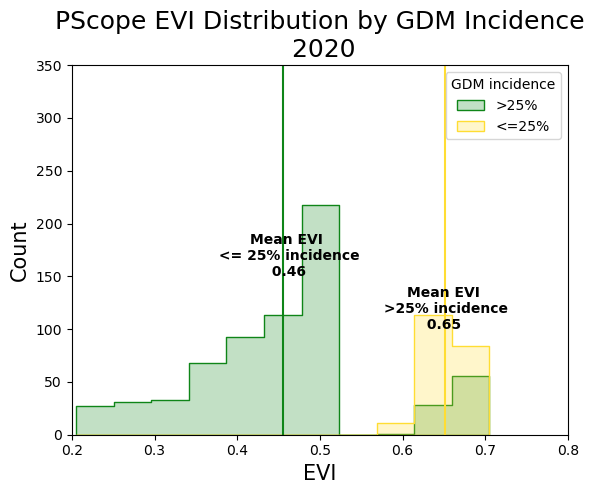

In [184]:
# Repeat with EVI 2020

# Plot distributions for 2020 incidence
colors = ["#FFDD33", "#0F8518"]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.2, 0.80)
plt.ylim(0, 350,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.65, 100, "Mean EVI\n >25% incidence\n 0.65 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.46, 150, "Mean EVI\n <= 25% incidence\n 0.46", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Incidence\n 2020', fontsize=18)
# plt.savefig("icpp_evi_20_inc.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_25927/2765197756.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 350,10)


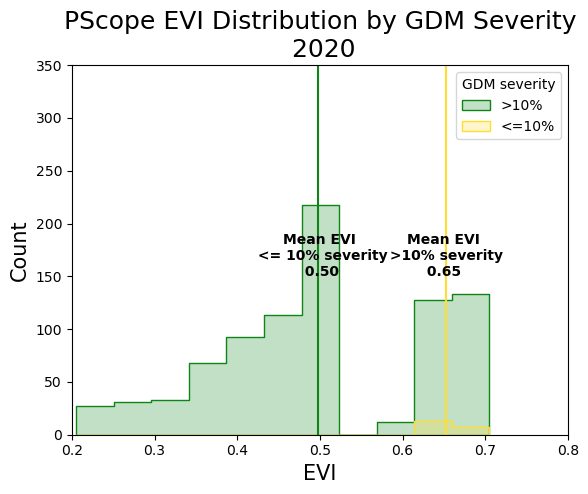

In [183]:
# Repeat with EVI 2021

# Plot distributions for 2020 severity
colors = [ "#FFDD33", "#0F8518",]
sns.set_palette(colors)
sns.histplot(data=vis_2020, x="evi", hue="severity_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.2, 0.80)
plt.ylim(0, 350,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.65, 150, "Mean EVI\n >10% severity\n 0.65 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2020[vis_2020['severity_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.50, 150, "Mean EVI\n <= 10% severity\n 0.50", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Severity\n 2020', fontsize=18)
# plt.savefig("icpp_evi_20_sev.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_25927/87361657.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,10)


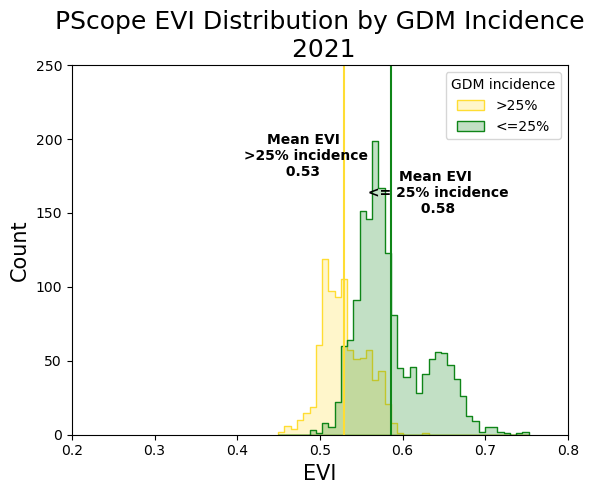

In [182]:
# Repeat with EVI 2021

# Plot distributions for 2021 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.2, 0.80)
plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.48, 175, "Mean EVI\n >25% incidence\n 0.53 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.64, 150, "Mean EVI\n <= 25% incidence\n 0.58", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Incidence\n 2021', fontsize=18)
# plt.savefig("icpp_evi_21_inc.svg")
plt.show()

In [149]:
print('HIgh sev EVI:', vis_2021[vis_2021['severity_class']=='high'].evi.mean())
print('Low sev EVI:', vis_2021[vis_2021['severity_class']=='low'].evi.mean())


HIgh sev EVI: 0.539337
Low sev EVI: 0.56816816


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_25927/778332053.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 350,10)


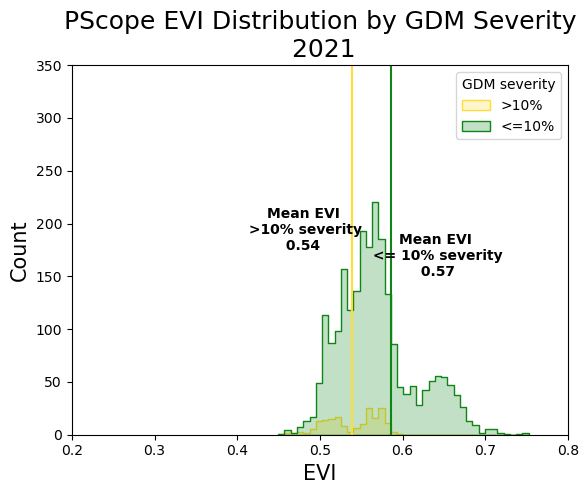

In [181]:
# Repeat with EVI 2021

# Plot distributions for 2021 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="evi", hue="severity_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.2, 0.80)
plt.ylim(0, 350,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.48, 175, "Mean EVI\n >10% severity\n 0.54 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.64, 150, "Mean EVI\n <= 10% severity\n 0.57", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Severity\n 2021', fontsize=18)
# plt.savefig("icpp_evi_21_sev.svg")
plt.show()

In [165]:
print('2022\n')
print("High incidence EVI:", vis_2022[vis_2022['inc_class']=='high'].evi.mean())
print("Low incidence EVI:", vis_2022[vis_2022['inc_class']=='low'].evi.mean())


print("High severity EVI:", vis_2022[vis_2022['severity_class']=='high'].evi.mean())
print("Low severity EVI:", vis_2022[vis_2022['severity_class']=='low'].evi.mean())

2022

High incidence EVI: 0.57193434
Low incidence EVI: 0.5119189
High severity EVI: 0.6101971
Low severity EVI: 0.51038224


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_25927/4049668575.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 350,10)


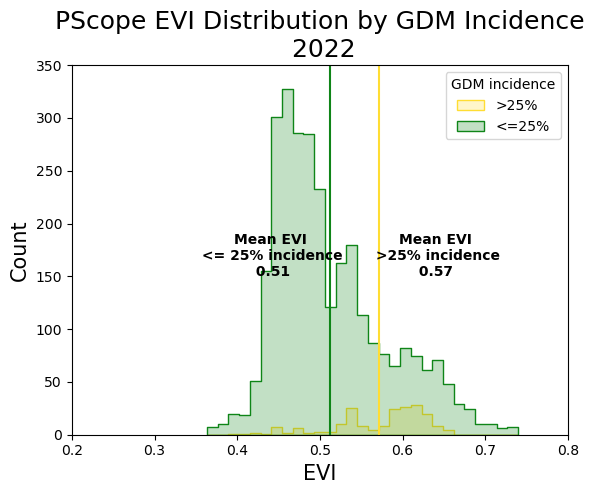

In [180]:
# Repeat with EVI 2022

# Plot distributions for 2022 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.2, 0.80)
plt.ylim(0, 350,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.64, 150, "Mean EVI\n >25% incidence\n 0.57 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.44, 150, "Mean EVI\n <= 25% incidence\n 0.51", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Incidence\n 2022', fontsize=18)
# plt.savefig("icpp_evi_22_inc.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_25927/508742172.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 350,10)


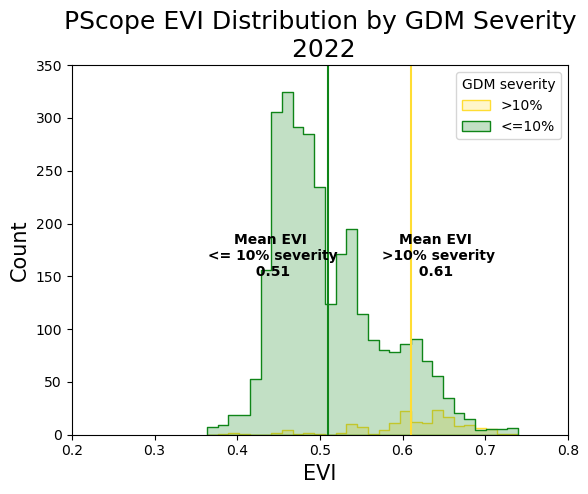

In [179]:
# Repeat with EVI 2022

# Plot distributions for 2022 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="evi", hue="severity_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.2, 0.80)
plt.ylim(0, 350,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.64, 150, "Mean EVI\n >10% severity\n 0.61 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.44, 150, "Mean EVI\n <= 10% severity\n 0.51", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Severity\n 2022', fontsize=18)
#plt.savefig("icpp_evi_22_sev.svg")
plt.show()

In [125]:
vis_2021[vis_2021['inc_class']=='high'].evi.mean()

0.5287812

In [126]:
vis_2021[vis_2021['inc_class']=='low'].evi.mean()

0.5856736

In [127]:
# 2021 mean severity 

hsev_2021 = vis_2021[vis_2021['severity_class']=='high'].evi.mean()
lsev_2021 = vis_2021[vis_2021['severity_class']=='low'].evi.mean()

print('high severity 2021:', hsev_2021)
print('low severity 2021:', lsev_2021)


high severity 2021: 0.539337
low severity 2021: 0.56816816


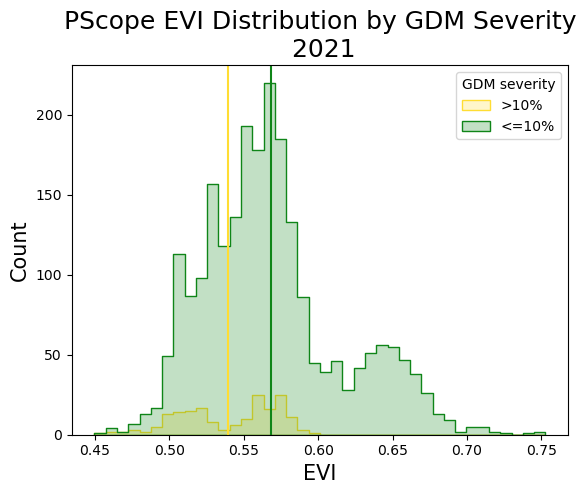

In [128]:
# Plot distributions for 2021 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2021, x="evi", hue="severity_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='high'].evi.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2021[vis_2021['severity_class']=='low'].evi.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Severity\n 2021', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

In [129]:
# Repeat for 2022

dis_ras_22 = glob.glob('../data/images/2022/PScope/dis_band_*/*.tif')
dis_ras_22

dfs_2022 = [img_to_df(dis_ras_22[i], cols) for i in np.arange(len(dis_ras_22))]
df_2022 = pd.concat(dfs_2022)
df_2022.head()

df_2022['total_dis_sev'] = df_2022['total_dis_sev']*10000
df_2022['dm_sev'] = df_2022['dm_sev']*10000
df_2022['dm_inc'] = df_2022['dm_inc']*10000

vis_2022 = add_vis(df_2022)

vis_2022['inc_class'] = 'low'
vis_2022.loc[vis_2022['dm_inc']>25,'inc_class']= 'high'
    
vis_2022['severity_class'] = 'low'
vis_2022.loc[vis_2022['dm_sev']>10,'severity_class']= 'high'

mw_u(veg_inds,vis_2022, 'inc_class')

,vi,mann-whitneyU,p_value
5,evi,138757.0,2.577702e-32
31,nir_green,138912.5,3.004059e-32
1,clre,139054.0,3.452532e-32
2,ndre,139054.0,3.452532e-32
6,savi,139397.5,4.837135e-32
34,nir_yellow,154079.5,4.164029e-26
27,nir_greenI,159187.0,3.431351e-24
23,nir_blue,161557.0,2.503059e-23
4,ndvi,162097.5,3.917211e-23
8,msr,162098.0,3.918830e-23


In [141]:
#Get correlation coefficients for all VIs
corr_cols = ['dm_sev', 'pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gri', 'arvi', 'cblue_blue',
       'cblue_greenI', 'cblue_green', 'cblue_yellow', 'cblue_red',
       'cblue_rede', 'nir_cblue', 'blue_greenI', 'blue_green', 'blue_yellow',
       'blue_red', 'blue_rede', 'nir_blue', 'greenI_yellow', 'greenI_red',
       'greenI_rede', 'nir_greenI', 'green_yellow', 'green_red', 'green_rede',
       'nir_green', 'yellow_red', 'yellow_rede', 'nir_yellow', 'red_rede']
filtered = vis_2022[corr_cols]
correlations_22 = filtered.corr()

correlations_22['dm_sev'].sort_values()

blue_greenI     -0.215154
yellow_rede     -0.174504
blue_rede       -0.145605
pri             -0.129707
blue_green      -0.100487
cblue_greenI    -0.078910
green_rede      -0.058203
cblue_rede      -0.033492
cblue_green      0.000828
blue_yellow      0.065356
cblue_blue       0.066041
greenI_rede      0.089036
cblue_yellow     0.097803
yellow_red       0.150701
cblue_red        0.159996
green_yellow     0.171337
blue_red         0.180528
red_rede         0.210213
tcari            0.223464
green_red        0.225850
gri              0.229627
greenI_red       0.263860
nir_cblue        0.268357
greenI_yellow    0.270565
nir_greenI       0.285930
arvi             0.286725
ndvi             0.295407
nir_yellow       0.305008
nir_green        0.310703
nir_blue         0.312861
msr              0.318265
sr               0.329974
ndre             0.335947
evi              0.342000
savi             0.342971
clre             0.354191
dm_sev           1.000000
Name: dm_sev, dtype: float64

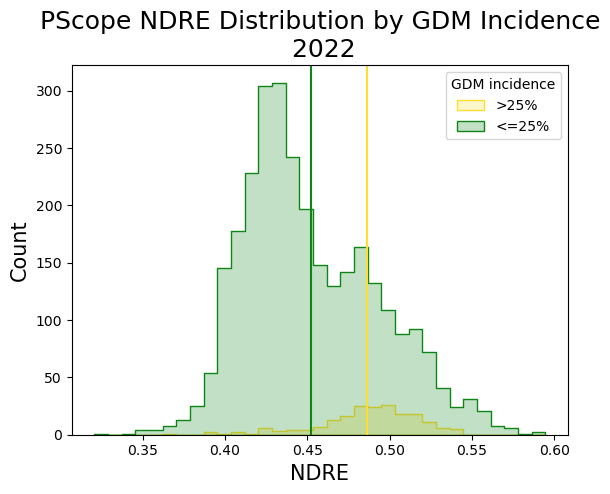

In [131]:
# Repeat with NDRE 2022

# Plot distributions for 2022 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="ndre", hue="inc_class", element='step')

plt.xlabel('NDRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='high'].ndre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='low'].ndre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope NDRE Distribution by GDM Incidence\n 2022', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

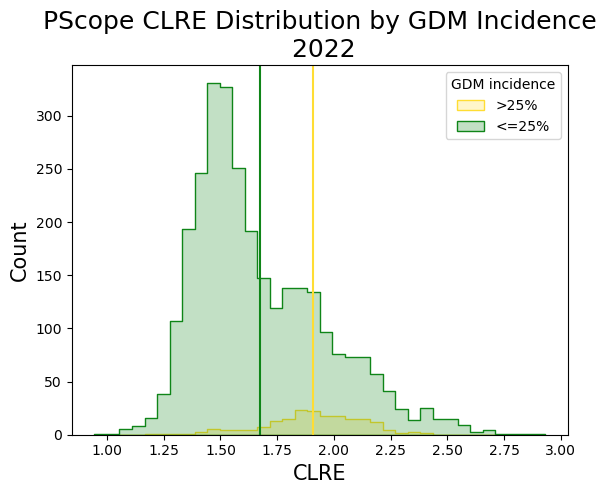

In [132]:
# Repeat with CLRE 2022

# Plot distributions for 2022 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="clre", hue="inc_class", element='step')

plt.xlabel('CLRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='high'].clre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='low'].clre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope CLRE Distribution by GDM Incidence\n 2022', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

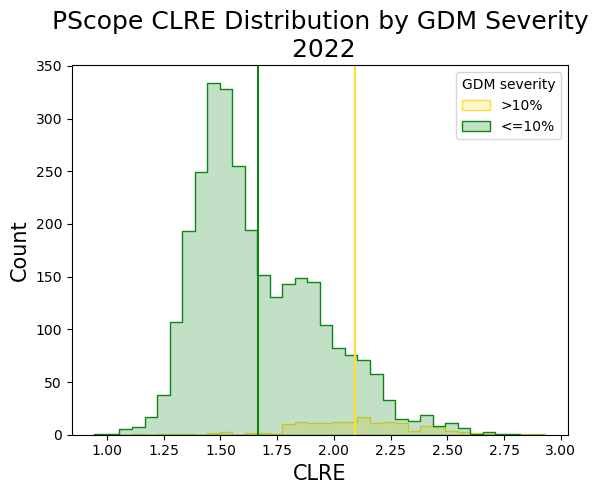

In [133]:
# Repeat with CLRE 2022

# Plot distributions for 2022 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="clre", hue="severity_class", element='step')

plt.xlabel('CLRE', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='high'].clre.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='low'].clre.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope CLRE Distribution by GDM Severity\n 2022', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

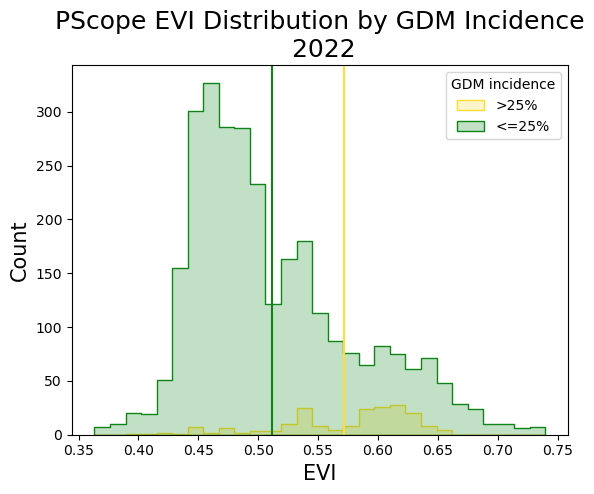

In [134]:
# Repeat with EVI 2022

# Plot distributions for 2022 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['inc_class']=='low'].evi.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Incidence\n 2022', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

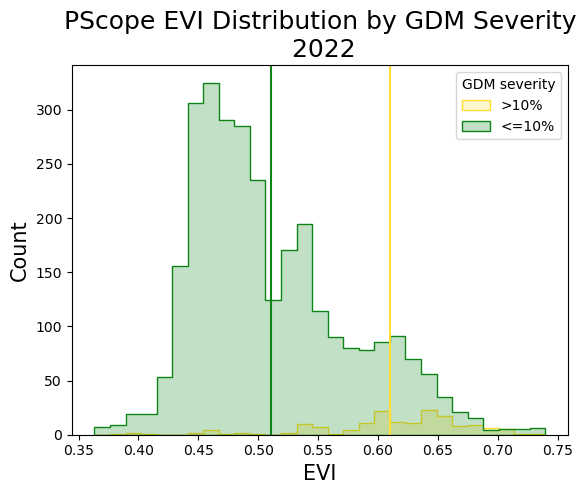

In [135]:
# Plot distributions for 2022 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=vis_2022, x="evi", hue="severity_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
#plt.xlim(0, 0.85)
#plt.ylim(0, 250,10)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='high'].evi.mean(),
            color="#FFDD33")
#plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=vis_2022[vis_2022['severity_class']=='low'].evi.mean(),
            color="#0F8518")

#plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('PScope EVI Distribution by GDM Severity\n 2022', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

In [136]:
vis = ['pri', 'clre', 'ndre', 
       'savi', 'evi', 
       'ndvi','arvi','gcc', 
       'gr', 'tcari','sr',
       'msr']

corr_coeffs = []
p_vals = []
vi_list = []

def spearman_df(veg_inds, df, var_name):
    corr_coeffs = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        sp_r, p = scipy.stats.spearmanr(df[var_name], df[vi])
        corr_coeffs.append(sp_r)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'spearmans_r':corr_coeffs, 'p_value':p_vals}
        corr_df = pd.DataFrame(dictionary).sort_values(by='spearmans_r')
    return print(var_name, "vs. VIs, spearman's correlations:\n\n", corr_df)

In [137]:
spearman_df (vis, dataframes[0], 'dm_sev')

NameError: name 'dataframes' is not defined

In [123]:
for i in range (3):
    spearman_df(vis,dataframes[i], 'total_dis_sev')

total_dis_sev vs. VIs, spearman's correlations:

        vi  spearmans_r   p_value
1    clre    -0.068468  0.241858
2    ndre     0.014490  0.804593
4     evi     0.035282  0.546798
6    arvi     0.037022  0.527190
3    savi     0.043875  0.453579
5    ndvi     0.058588  0.316749
10     sr     0.058588  0.316749
11    msr     0.058588  0.316749
8      gr     0.087029  0.136566
9   tcari     0.102363  0.079725
7     gcc     0.111627  0.055899
0     pri     0.145875  0.012280
total_dis_sev vs. VIs, spearman's correlations:

        vi  spearmans_r       p_value
0     pri    -0.204585  4.653199e-04
3    savi    -0.136774  2.001720e-02
4     evi    -0.133295  2.343195e-02
9   tcari    -0.089438  1.292907e-01
2    ndre     0.084414  1.523233e-01
5    ndvi     0.116503  4.784839e-02
10     sr     0.116503  4.784839e-02
11    msr     0.116503  4.784839e-02
7     gcc     0.191603  1.062195e-03
6    arvi     0.192280  1.018720e-03
1    clre     0.214855  2.334429e-04
8      gr     0.353481  6.2

In [125]:
master_df = pd.concat(dataframes)

In [127]:
spearman_df(vis,master_df, 'dm_sev')

dm_sev vs. VIs, spearman's correlations:

        vi  spearmans_r       p_value
1    clre    -0.383746  4.081959e-32
7     gcc     0.030945  3.602907e-01
9   tcari     0.164041  1.053705e-06
3    savi     0.391480  1.833095e-33
4     evi     0.393596  7.730082e-34
0     pri     0.444110  1.222135e-43
5    ndvi     0.448709  1.286395e-44
10     sr     0.448711  1.285114e-44
11    msr     0.448711  1.285114e-44
2    ndre     0.451872  2.680635e-45
6    arvi     0.487868  1.418422e-53
8      gr     0.489774  4.847069e-54


<AxesSubplot: xlabel='clre', ylabel='dm_sev'>

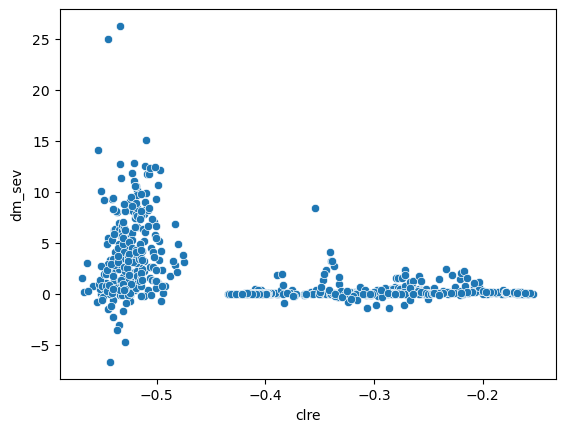

In [129]:
sns.scatterplot(data=master_df, x='clre', y='dm_sev')

# Functionalize: Get all images as dataframes


In [30]:
with rio.open(dis_ras[0]) as src:
    src.read(1)
    print(src.read(0+1).shape)

(22, 41)


In [38]:
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']
with rio.open(dis_ras[0]) as src:
    array = src.read()
    
    band_arrs = []
    
    for i in np.arange(src.count):
        band_arr = array[i].flatten()
        band_arrs.append(band_arr)
    
    df = pd.DataFrame(band_arrs,cols).T


In [40]:
df.describe()

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,dm_inc
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,293.000000,293.000000,293.000000
mean,185.531036,260.664093,343.909088,396.582031,335.327057,323.117523,592.873596,2012.803711,4.358563,3.955640,41.060352
std,211.145950,293.419861,386.679352,445.776031,382.886536,363.762085,666.560059,2263.818848,4.380634,3.981951,24.110256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.685268,-6.682862,-22.663548
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.282336,1.108445,19.821308
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.449509,3.094291,44.102081
75%,402.000000,582.750000,773.000000,894.000000,705.750000,721.000000,1335.000000,4534.750000,6.291466,6.005724,60.505817
max,616.000000,702.000000,845.000000,961.000000,1002.000000,833.000000,1449.000000,5066.000000,27.325079,26.237585,86.905602


In [41]:
def img_to_df(img_path, cols):
    with rio.open(img_path) as src:
        as_array = src.read()
        band_arrs = []
        
        for i in np.arange(src.count):
            band_arr = as_array[i].flatten()
            
            band_arrs.append(band_arr)
        
        df = pd.DataFrame(band_arrs,cols).T
        return df

In [42]:
# Test 

img_to_df(dis_ras[0], cols)

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,dm_inc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
900,460.0,640.0,826.0,923.0,924.0,763.0,1313.0,4270.0,NaN,NaN,NaN


In [43]:
# Function to add VIs

def add_vis(df):
    df['pri']= (df['green']- df['greenI'])/(df['green']+df['greenI'])
    df['clre'] = (df['nir'])/(df['rede']-1)
    df['ndre'] = (df['nir'] - df['rede']) / (df['nir'] + df['rede'])
    #df['mcari'] = ((df['rede'] - df['red']) - (0.2(df['red'] - df['green'])) * (df['rede'] - df['red']))
    df['tcari'] = 3 * (( (df['rede'] - df['red']) - 0.2 * (df['rede'] - df['green']) ) * (df['rede'] / df['red']))
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['sr']= df['nir']/df['red']
    df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    df['gr']=df['green']/df['red']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    
    return df

In [44]:
# Test
orig_df = img_to_df(dis_ras[0], cols)
with_vis = add_vis(orig_df)

In [45]:
with_vis

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,ndre,tcari,ndvi,evi,savi,sr,msr,gr,gcc,arvi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
900,460.0,640.0,826.0,923.0,924.0,763.0,1313.0,4270.0,NaN,NaN,...,0.529644,2436.707764,0.696801,2.165349,1.045098,5.596330,1.789617,1.209699,0.396819,0.656323


In [46]:
no_nans = with_vis.dropna(subset=['total_dis_sev'])
no_nans.shape

(293, 23)

In [48]:
no_nans.isna().sum()

c_blue           0
blue             0
greenI           0
green            0
yellow           0
red              0
rede             0
nir              0
total_dis_sev    0
dm_sev           0
dm_inc           0
pri              0
clre             0
ndre             0
tcari            0
ndvi             0
evi              0
savi             0
sr               0
msr              0
gr               0
gcc              0
arvi             0
dtype: int64

In [51]:
no_nans.describe()

,c_blue,blue,greenI,green,yellow,red,rede,nir,total_dis_sev,dm_sev,...,ndre,tcari,ndvi,evi,savi,sr,msr,gr,gcc,arvi
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,...,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,417.412964,587.672363,775.587036,895.583618,758.614319,732.771301,1342.931763,4545.119629,4.358563,3.955640,...,0.543615,2878.275635,0.722070,2.104576,1.083002,6.219275,1.940538,1.224419,0.404277,0.676076
std,51.570377,22.699839,21.390614,19.856781,96.136589,32.893856,36.318069,142.146042,4.380634,3.981951,...,0.015642,356.109558,0.015914,0.098223,0.023870,0.407914,0.097363,0.056825,0.009024,0.022122
min,325.000000,535.000000,714.000000,817.000000,587.000000,663.000000,1230.000000,4089.000000,-6.685268,-6.682862,...,0.489075,2005.373047,0.674790,1.893909,1.012082,5.149874,1.673408,1.099751,0.385658,0.612700
25%,380.000000,573.000000,759.000000,884.000000,677.000000,710.000000,1318.000000,4464.000000,1.282336,1.108445,...,0.533617,2615.068115,0.709810,2.038352,1.064615,5.892031,1.863441,1.177922,0.397697,0.658779
50%,407.000000,588.000000,774.000000,897.000000,729.000000,729.000000,1343.000000,4550.000000,3.449509,3.094291,...,0.544828,2914.238281,0.724494,2.100743,1.086637,6.259362,1.952018,1.220196,0.404484,0.679319
75%,441.000000,605.000000,791.000000,909.000000,838.000000,760.000000,1371.000000,4638.000000,6.291466,6.005724,...,0.554683,3104.141113,0.733910,2.166211,1.100762,6.516266,2.012075,1.263380,0.410526,0.692472
max,616.000000,638.000000,824.000000,950.000000,969.000000,805.000000,1449.000000,4899.000000,27.325079,26.237585,...,0.577827,3875.427979,0.756697,2.371942,1.134942,7.220211,2.169520,1.360825,0.428835,0.722161


In [52]:
def spearman_df(veg_inds, df, var_name):
    corr_coeffs = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        sp_r, p = scipy.stats.spearmanr(df[var_name], df[vi])
        corr_coeffs.append(sp_r)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'spearmans_r':corr_coeffs, 'p_value':p_vals}
        corr_df = pd.DataFrame(dictionary).sort_values(by='spearmans_r')
    return print(var_name, "vs. VIs, spearman's correlations:\n\n", corr_df)

In [53]:
no_nans.columns

Index(['c_blue', 'blue', 'greenI', 'green', 'yellow', 'red', 'rede', 'nir',
       'total_dis_sev', 'dm_sev', 'dm_inc', 'pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gr', 'gcc', 'arvi'],
      dtype='object')

In [54]:
veg_inds = ['pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gr', 'gcc', 'arvi']

spearman_df(veg_inds, no_nans, 'dm_sev')

dm_sev vs. VIs, spearman's correlations:

        vi  spearmans_r   p_value
0     pri    -0.275266  0.000002
10    gcc    -0.235579  0.000046
9      gr    -0.180504  0.001922
3   tcari    -0.160685  0.005839
6    savi    -0.150379  0.009945
4    ndvi    -0.150333  0.009968
7      sr    -0.150333  0.009968
8     msr    -0.150333  0.009968
11   arvi    -0.111129  0.057436
2    ndre    -0.052396  0.371506
1    clre    -0.052393  0.371532
5     evi    -0.017954  0.759577


In [3]:
# Final functions to chain together

def img_to_df(img_path, cols):
    with rio.open(img_path) as src:
        as_array = src.read()
        band_arrs = []
        
        for i in np.arange(src.count):
            band_arr = as_array[i].flatten()
            
            band_arrs.append(band_arr)
        
        df = pd.DataFrame(band_arrs,cols).T
        
        # Optional: drops entries with no severity rating. Comment out if unnecessary.
        no_nans = df.dropna(subset=['total_dis_sev']) 
        
        return no_nans

def add_vis(df):
    df['pri']= (df['green']- df['greenI'])/(df['green']+df['greenI'])
    df['clre'] = (df['nir'])/(df['rede']-1)
    df['ndre'] = (df['nir'] - df['rede']) / (df['nir'] + df['rede'])
    #df['mcari'] = ((df['rede'] - df['red']) - (0.2(df['red'] - df['green'])) * (df['rede'] - df['red']))
    df['tcari'] = 3 * (( (df['rede'] - df['red']) - 0.2 * (df['rede'] - df['green']) ) * (df['rede'] / df['red']))
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['sr']= df['nir']/df['red']
    df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    df['gr']=df['green']/df['red']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    
    return df

def spearman_df(veg_inds, df, var_name):
    corr_coeffs = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        sp_r, p = scipy.stats.spearmanr(df[var_name], df[vi])
        corr_coeffs.append(sp_r)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'spearmans_r':corr_coeffs, 'p_value':p_vals}
        corr_df = pd.DataFrame(dictionary).sort_values(by='spearmans_r')
        
    return corr_df

In [67]:
# Test with a list of images
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

veg_inds = ['pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gr', 'gcc', 'arvi']

corr_dfs_2020 = []

for i in dis_ras:
    as_df = img_to_df(i, cols)
    
    with_vis = add_vis(as_df)
    
    corr_df = spearman_df(veg_inds, with_vis, 'dm_sev')
    
    corr_dfs_2020.append(corr_df)


In [68]:
corr_dfs_2020[0]

,vi,spearmans_r,p_value
0,pri,-0.275266,0.000002
10,gcc,-0.235579,0.000046
9,gr,-0.180504,0.001922
3,tcari,-0.160685,0.005839
6,savi,-0.150379,0.009945
4,ndvi,-0.150333,0.009968
7,sr,-0.150333,0.009968
8,msr,-0.150333,0.009968
11,arvi,-0.111129,0.057436
2,ndre,-0.052396,0.371506


In [69]:
# Add keys to each dataframe to link them to the image date

dis_ras[0]

'../data/images/2020/PScope/dis_band_2020/20200801_151354_03_2212_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif'

In [74]:
img_date = os.path.split(dis_ras[0])[1].split('_')[0]
img_date

'20200801'

In [77]:
date_keys = []
for i in np.arange(len(dis_ras)):
    img_date = os.path.split(dis_ras[i])[1].split('_')[0]
    date_keys.append(img_date)

In [78]:
date_keys

['20200801', '20200713', '20200616']

In [79]:
# Incorporate date key

# Define variables
cols = ['c_blue','blue','greenI', 'green', 'yellow', 'red', 'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

veg_inds = ['pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gr', 'gcc', 'arvi']

# Set up empty lists
corr_dfs_2020 = []

date_keys = []

# loop through 2020 images
for i in np.arange(len(dis_ras)):
    
    img_date = os.path.split(dis_ras[i])[1].split('_')[0]
    
    date_keys.append(img_date)
    
    as_df = img_to_df(dis_ras[i], cols)
    
    with_vis = add_vis(as_df)
    
    corr_df = spearman_df(veg_inds, with_vis, 'dm_sev')
    
    corr_dfs_2020.append(corr_df)

df_dict = {date_keys[i]: corr_dfs_2020[i] for i in range(len(date_keys))}

In [80]:
df_dict

{'20200801':        vi  spearmans_r   p_value
 0     pri    -0.275266  0.000002
 10    gcc    -0.235579  0.000046
 9      gr    -0.180504  0.001922
 3   tcari    -0.160685  0.005839
 6    savi    -0.150379  0.009945
 4    ndvi    -0.150333  0.009968
 7      sr    -0.150333  0.009968
 8     msr    -0.150333  0.009968
 11   arvi    -0.111129  0.057436
 2    ndre    -0.052396  0.371506
 1    clre    -0.052393  0.371532
 5     evi    -0.017954  0.759577,
 '20200713':        vi  spearmans_r   p_value
 3   tcari    -0.134859  0.021839
 0     pri    -0.089641  0.128422
 10    gcc     0.015629  0.791349
 4    ndvi     0.030378  0.607038
 7      sr     0.030378  0.607038
 8     msr     0.030378  0.607038
 6    savi     0.030416  0.606590
 2    ndre     0.087542  0.137647
 1    clre     0.088125  0.135032
 9      gr     0.093500  0.112721
 11   arvi     0.093565  0.112469
 5     evi     0.122954  0.036699,
 '20200616':        vi  spearmans_r   p_value
 4    ndvi    -0.105488  0.070905
 7      sr

In [81]:
df_dict['20200801']

,vi,spearmans_r,p_value
0,pri,-0.275266,0.000002
10,gcc,-0.235579,0.000046
9,gr,-0.180504,0.001922
3,tcari,-0.160685,0.005839
6,savi,-0.150379,0.009945
4,ndvi,-0.150333,0.009968
7,sr,-0.150333,0.009968
8,msr,-0.150333,0.009968
11,arvi,-0.111129,0.057436
2,ndre,-0.052396,0.371506


In [2]:
# Final functions to chain together

def img_to_df(img_path, cols):
    with rio.open(img_path) as src:
        as_array = src.read()
        band_arrs = []
        
        for i in np.arange(src.count):
            band_arr = as_array[i].flatten()
            
            band_arrs.append(band_arr)
        
        df = pd.DataFrame(band_arrs,cols).T
        
        # Optional: drops entries with no severity rating. Comment out if unnecessary.
        no_nans = df.dropna(subset=['total_dis_sev']) 
        
        return no_nans

def add_vis(df):
    df['pri']= (df['green']- df['greenI'])/(df['green']+df['greenI'])
    df['clre'] = (df['nir'])/(df['rede']-1)
    df['ndre'] = (df['nir'] - df['rede']) / (df['nir'] + df['rede'])
    #df['mcari'] = ((df['rede'] - df['red']) - (0.2(df['red'] - df['green'])) * (df['rede'] - df['red']))
    df['tcari'] = 3 * (( (df['rede'] - df['red']) - 0.2 * (df['rede'] - df['green']) ) * (df['rede'] / df['red']))
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['sr']= df['nir']/df['red']
    df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    df['gr']=df['green']/df['red']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    
    return df

def spearman_df(veg_inds, df, var_name):
    corr_coeffs = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        sp_r, p = scipy.stats.spearmanr(df[var_name], df[vi])
        corr_coeffs.append(sp_r)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'spearmans_r':corr_coeffs, 'p_value':p_vals}
        corr_df = pd.DataFrame(dictionary).sort_values(by='spearmans_r')
        
    return corr_df

In [3]:
# Master function

def get_corr_dict(raster_path_lst, cols, veg_inds, var_name):
    
    date_keys = []
    corr_dfs = []
    
    for i in np.arange(len(raster_path_lst)):
        
        # Modify this guy for diff. naming formats
        img_date = os.path.split(raster_path_lst[i])[1].split('_')[0]
        
        date_keys.append(img_date)
        
        as_df = img_to_df(raster_path_lst[i], cols)
        
        with_vis = add_vis(as_df)
        
        corr_df = spearman_df(veg_inds, with_vis, var_name)
        
        corr_dfs.append(corr_df)
    
    df_dict = {date_keys[i]: corr_dfs[i] for i in range(len(date_keys))}
    
    return df_dict

In [4]:
dis_ras_20 = glob.glob('../data/images/2020/PScope/dis_band_*/*.tif')

In [7]:
# Test master function

cols = ['c_blue','blue','greenI', 
        'green', 'yellow', 'red', 
        'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

veg_inds = ['pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gr', 'gcc', 'arvi']

test_dict = get_corr_dict(dis_ras_20, cols, veg_inds, 'dm_inc')

In [8]:
test_dict['20200801']

,vi,spearmans_r,p_value
10,gcc,-0.353922,4.510707e-10
0,pri,-0.347597,9.580555e-10
9,gr,-0.340891,2.091288e-09
6,savi,-0.292831,3.337066e-07
4,ndvi,-0.292770,3.356819e-07
7,sr,-0.292770,3.356819e-07
8,msr,-0.292770,3.356819e-07
11,arvi,-0.279272,1.192325e-06
3,tcari,-0.275005,1.755828e-06
5,evi,-0.197840,6.598857e-04


In [9]:
print("Spearman's rank correlation, GDM Incidence 2020-08-01\n\n", test_dict['20200801'])

Spearman's rank correlation, GDM Incidence 2020-08-01

        vi  spearmans_r       p_value
10    gcc    -0.353922  4.510707e-10
0     pri    -0.347597  9.580555e-10
9      gr    -0.340891  2.091288e-09
6    savi    -0.292831  3.337066e-07
4    ndvi    -0.292770  3.356819e-07
7      sr    -0.292770  3.356819e-07
8     msr    -0.292770  3.356819e-07
11   arvi    -0.279272  1.192325e-06
3   tcari    -0.275005  1.755828e-06
5     evi    -0.197840  6.598857e-04
2    ndre    -0.123316  3.487009e-02
1    clre    -0.123265  3.494565e-02


In [10]:
dis_ras_21 = glob.glob('../data/images/2021/PScope/dis_band_*/*.tif')
dis_ras_21

['../data/images/2021/PScope/dis_band_2021/20210808_150651_57_2460_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif',
 '../data/images/2021/PScope/dis_band_2021/20210804_152058_95_222f_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif',
 '../data/images/2021/PScope/dis_band_2021/20210726_155527_27_227a_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif',
 '../data/images/2021/PScope/dis_band_2021/20210715_151038_58_2450_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif']

In [11]:
dict_21 = get_corr_dict(dis_ras_21, cols, veg_inds, 'dm_inc')

/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [12]:
print(dict_21.keys())

dict_keys(['20210808', '20210804', '20210726', '20210715'])


In [14]:
print("Spearman's rank correlation, GDM Incidence 2021-08-04\n\n", dict_21['20210804'])

Spearman's rank correlation, GDM Incidence 2021-08-04

        vi  spearmans_r  p_value
0     pri          NaN      NaN
1    clre          NaN      NaN
2    ndre          NaN      NaN
3   tcari          NaN      NaN
4    ndvi          NaN      NaN
5     evi          NaN      NaN
6    savi          NaN      NaN
7      sr          NaN      NaN
8     msr          NaN      NaN
9      gr          NaN      NaN
10    gcc          NaN      NaN
11   arvi          NaN      NaN


In [91]:
dict_21_total = get_corr_dict(dis_ras_21, cols, veg_inds, 'total_dis_sev')

In [92]:
dict_21_total

{'20210808':        vi  spearmans_r   p_value
 1    clre    -0.130477  0.001098
 2    ndre    -0.130451  0.001101
 11   arvi    -0.064553  0.107467
 5     evi    -0.061656  0.124220
 6    savi    -0.060350  0.132406
 4    ndvi    -0.060314  0.132640
 7      sr    -0.060314  0.132640
 8     msr    -0.060314  0.132640
 9      gr    -0.003196  0.936536
 10    gcc     0.008218  0.837788
 3   tcari     0.036766  0.359596
 0     pri     0.169591  0.000021,
 '20210804':        vi  spearmans_r       p_value
 11   arvi    -0.237540  1.934539e-09
 4    ndvi    -0.229428  6.936423e-09
 7      sr    -0.229428  6.936423e-09
 8     msr    -0.229428  6.936423e-09
 6    savi    -0.229410  6.955544e-09
 5     evi    -0.227683  9.073969e-09
 1    clre    -0.198165  6.171429e-07
 2    ndre    -0.198043  6.271677e-07
 9      gr    -0.192166  1.352102e-06
 10    gcc    -0.159741  6.204894e-05
 3   tcari    -0.127243  1.459885e-03
 0     pri    -0.002666  9.470612e-01,
 '20210726':        vi  spearmans_r   

In [118]:
dict_21_inc = get_corr_dict(dis_ras_21, cols, veg_inds, 'dm_inc')

/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [114]:
print("Spearman's rank correlation, DM Incidence 2021-07-26\n\n", dict_21_inc['20210726'])

Spearman's rank correlation, DM Incidence 2021-07-26

        vi  spearmans_r       p_value
6    savi    -0.284659  4.449048e-13
4    ndvi    -0.284648  4.458780e-13
7      sr    -0.284648  4.458780e-13
8     msr    -0.284648  4.458780e-13
11   arvi    -0.249272  2.805318e-10
1    clre    -0.205468  2.297704e-07
2    ndre    -0.205392  2.322060e-07
5     evi    -0.146595  2.411252e-04
9      gr    -0.099491  1.297428e-02
10    gcc    -0.095168  1.750092e-02
3   tcari    -0.029300  4.653871e-01
0     pri     0.083162  3.797379e-02


In [15]:
dis_ras_22 = glob.glob('../data/images/2022/PScope/dis_band_*/*.tif')
dis_ras_22

['../data/images/2022/PScope/dis_band_2022/20220726_155410_80_2407_3B_AnalyticMS_SR_8b_clipped_clipped.tif_disease.tif',
 '../data/images/2022/PScope/dis_band_2022/20220801_150200_56_245c_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif',
 '../data/images/2022/PScope/dis_band_2022/20220828_151645_10_2262_3B_AnalyticMS_SR_8b_harmonized_clip_clipped.tif_disease.tif',
 '../data/images/2022/PScope/dis_band_2022/20220630_150422_85_241d_3B_AnalyticMS_SR_8b_clipped_clipped.tif_disease.tif',
 '../data/images/2022/PScope/dis_band_2022/20220704_155057_15_240a_3B_AnalyticMS_SR_8b_clipped_clipped.tif_disease.tif',
 '../data/images/2022/PScope/dis_band_2022/20220624_150204_01_241b_3B_AnalyticMS_SR_8b_clipped_clipped.tif_disease.tif']

In [16]:
#dict_22_sev = get_corr_dict(dis_ras_22, cols, veg_inds, 'dm_sev')
dict_22_inc = get_corr_dict(dis_ras_22, cols, veg_inds, 'dm_inc')

In [18]:
print(dict_22_inc.keys())

dict_keys(['20220726', '20220801', '20220828', '20220630', '20220704', '20220624'])


In [20]:
print("Spearman's rank correlation, GDM Incidence 2022-08-01\n\n", dict_22_inc['20220801'])

Spearman's rank correlation, GDM Incidence 2022-08-01

        vi  spearmans_r       p_value
6    savi    -0.281200  8.714720e-13
4    ndvi    -0.281197  8.720649e-13
7      sr    -0.281197  8.720649e-13
8     msr    -0.281197  8.720649e-13
9      gr    -0.274387  3.189040e-12
10    gcc    -0.273507  3.760613e-12
11   arvi    -0.261158  3.576639e-11
2    ndre    -0.222675  1.937746e-08
1    clre    -0.222660  1.942042e-08
5     evi    -0.214665  6.286349e-08
3   tcari    -0.188885  2.055482e-06
0     pri     0.033788  3.998527e-01


In [133]:
print("Spearman's rank correlation, DM Severity 2022-06-24\n\n", dict_22_sev['20220624'])

Spearman's rank correlation, DM Severity 2022-06-24

        vi  spearmans_r       p_value
0     pri    -0.111102  5.501099e-03
2    ndre     0.057145  1.542639e-01
1    clre     0.057292  1.532065e-01
3   tcari     0.180629  5.710973e-06
5     evi     0.214797  6.167091e-08
4    ndvi     0.214963  6.021442e-08
7      sr     0.214963  6.021442e-08
8     msr     0.214963  6.021442e-08
6    savi     0.214981  6.006106e-08
10    gcc     0.215977  5.200138e-08
11   arvi     0.221114  2.445866e-08
9      gr     0.251627  1.880908e-10


In [134]:
print("Spearman's rank correlation, DM Severity 2022-07-04\n\n", dict_22_sev['20220704'])

Spearman's rank correlation, DM Severity 2022-07-04

        vi  spearmans_r   p_value
5     evi    -0.071180  0.075843
11   arvi    -0.055054  0.169931
4    ndvi    -0.042155  0.293475
7      sr    -0.042155  0.293475
8     msr    -0.042155  0.293475
6    savi    -0.042140  0.293642
2    ndre    -0.042082  0.294311
1    clre    -0.042073  0.294415
9      gr    -0.040328  0.314914
0     pri    -0.020356  0.612069
10    gcc    -0.012630  0.753051
3   tcari    -0.004092  0.918812


In [135]:
print("Spearman's rank correlation, DM Severity 2022-06-30\n\n", dict_22_sev['20220630'])

Spearman's rank correlation, DM Severity 2022-06-30

        vi  spearmans_r   p_value
0     pri     0.031093  0.438509
2    ndre     0.065950  0.100053
1    clre     0.065957  0.100016
5     evi     0.101579  0.011185
3   tcari     0.132445  0.000920
9      gr     0.134490  0.000764
11   arvi     0.136657  0.000626
10    gcc     0.146707  0.000238
6    savi     0.157243  0.000081
4    ndvi     0.157260  0.000081
7      sr     0.157260  0.000081
8     msr     0.157260  0.000081


In [136]:
print("Spearman's rank correlation, DM Severity 2022-08-01\n\n", dict_22_sev['20220801'])

Spearman's rank correlation, DM Severity 2022-08-01

        vi  spearmans_r       p_value
0     pri     0.009819  8.067660e-01
3   tcari     0.193574  1.127195e-06
2    ndre     0.290900  1.291509e-13
1    clre     0.290902  1.290764e-13
5     evi     0.304185  8.367824e-15
10    gcc     0.313059  1.241961e-15
9      gr     0.332340  1.569115e-17
11   arvi     0.349080  2.719506e-19
4    ndvi     0.358618  2.412253e-20
7      sr     0.358618  2.412253e-20
8     msr     0.358618  2.412253e-20
6    savi     0.358634  2.402440e-20


In [137]:
print("Spearman's rank correlation, DM Severity 2022-08-28\n\n", dict_22_sev['20220828'])

Spearman's rank correlation, DM Severity 2022-08-28

        vi  spearmans_r  p_value
0     pri          NaN      NaN
1    clre          NaN      NaN
2    ndre          NaN      NaN
3   tcari          NaN      NaN
4    ndvi          NaN      NaN
5     evi          NaN      NaN
6    savi          NaN      NaN
7      sr          NaN      NaN
8     msr          NaN      NaN
9      gr          NaN      NaN
10    gcc          NaN      NaN
11   arvi          NaN      NaN


# Correlation heatmaps


In [12]:
#2020

cols = ['c_blue','blue','greenI', 
        'green', 'yellow', 'red', 
        'rede', 'nir','total_dis_sev','dm_sev', 'dm_inc']

veg_inds = ['pri', 'clre', 'ndre', 'tcari',
       'ndvi', 'evi', 'savi', 'sr', 'msr', 'gr', 'gcc', 'arvi']

date_keys = []
corr_dfs = []
    
for i in np.arange(len(dis_ras)):
    # Modify this guy for diff. naming formats
    img_date = os.path.split(dis_ras[i])[1].split('_')[0]
    date_keys.append(img_date)
    df_2020 = img_to_df(dis_ras[i], cols)
    df_2020 = add_vis(df_2020)
    corr_dfs.append(df_2020)

df_dict = {date_keys[i]: corr_dfs[i] for i in range(len(date_keys))}
#     dfs_2020 = [img_to_df(dis_ras[i],cols) for i in np.arange(len(dis_ras))]

# dfs_2020 = [add_vis(df) for df in dfs_2020]

In [43]:
for_corr = df_dict['20200801'][['pri', 'clre', 
                                'ndre', 'tcari','ndvi', 'evi', 
                                'savi', 'sr', 'msr', 'gr', 'gcc', 
                                'arvi','dm_inc']]

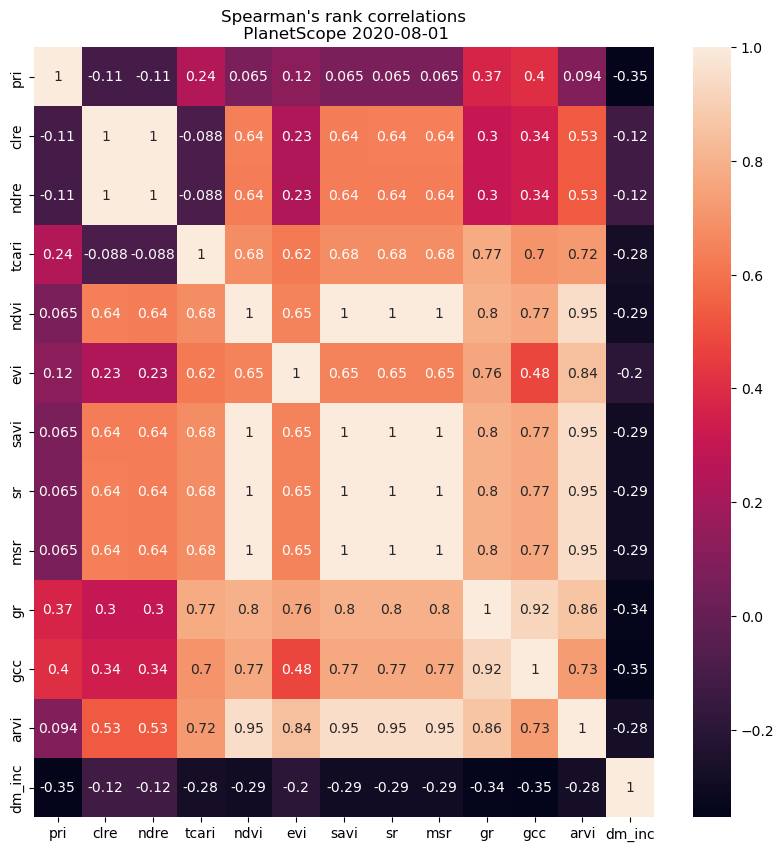

In [44]:
correls = for_corr.corr(method = 'spearman')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correls, annot = True).set(title="Spearman's rank correlations\n PlanetScope 2020-08-01")

plt.show()


In [29]:
#2021

dis_ras_21 = glob.glob('../data/images/2021/PScope/dis_band_*/*.tif')

date_keys = []
corr_dfs = []
    
for i in np.arange(len(dis_ras_21)):
    # Modify this guy for diff. naming formats
    img_date = os.path.split(dis_ras_21[i])[1].split('_')[0]
    date_keys.append(img_date)
    df_2021 = img_to_df(dis_ras_21[i], cols)
    df_2021 = add_vis(df_2021)
    corr_dfs.append(df_2021)

df_dict_21 = {date_keys[i]: corr_dfs[i] for i in range(len(date_keys))}

In [30]:
df_dict_21.keys()

dict_keys(['20210808', '20210804', '20210726', '20210715'])

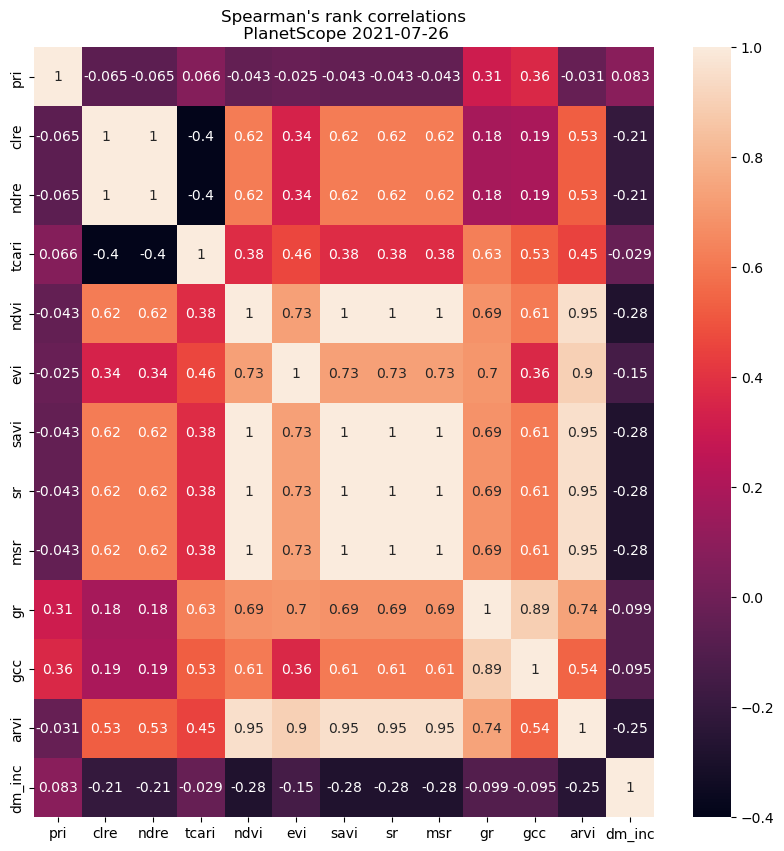

In [42]:
for_corr_21 = df_dict_21['20210726'][['pri', 'clre', 
                                'ndre', 'tcari','ndvi', 'evi', 
                                'savi', 'sr', 'msr', 'gr', 'gcc', 
                                'arvi','dm_inc']]

correls_21 = for_corr_21.corr(method = 'spearman')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correls_21, annot = True).set(title="Spearman's rank correlations\n PlanetScope 2021-07-26")

plt.show()

In [33]:
#2022

dis_ras_22 = glob.glob('../data/images/2022/PScope/dis_band_*/*.tif')

date_keys = []
corr_dfs = []
    
for i in np.arange(len(dis_ras_22)):
    # Modify this guy for diff. naming formats
    img_date = os.path.split(dis_ras_22[i])[1].split('_')[0]
    date_keys.append(img_date)
    df_2022 = img_to_df(dis_ras_22[i], cols)
    df_2022 = add_vis(df_2022)
    corr_dfs.append(df_2022)

df_dict_22 = {date_keys[i]: corr_dfs[i] for i in range(len(date_keys))}

In [34]:
df_dict_22.keys()

dict_keys(['20220726', '20220801', '20220828', '20220630', '20220704', '20220624'])

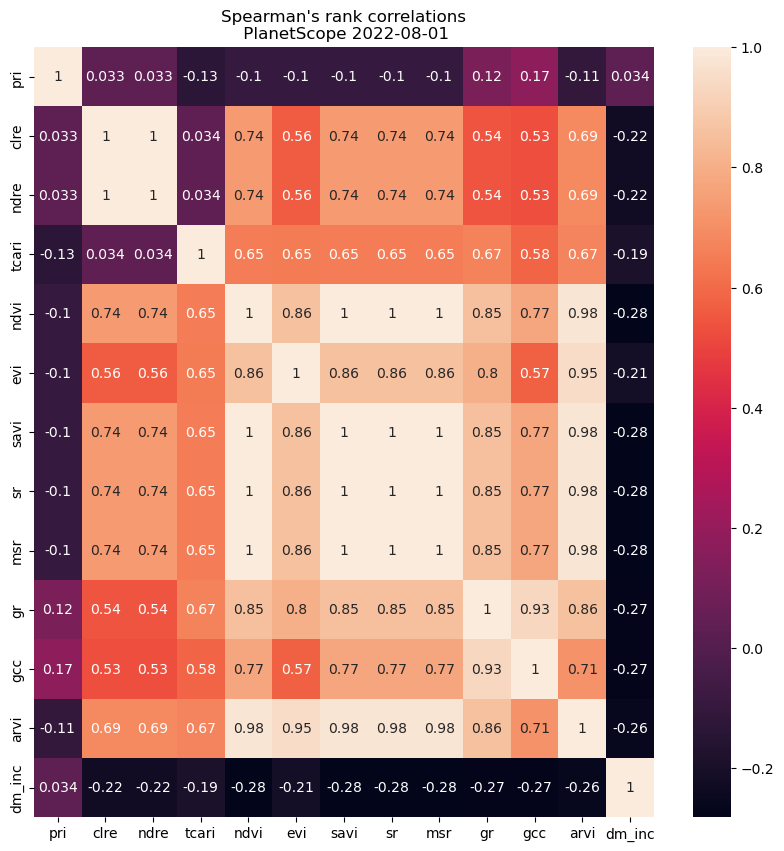

In [48]:
for_corr_22 = df_dict_22['20220801'][['pri', 'clre', 
                                'ndre', 'tcari','ndvi', 'evi', 
                                'savi', 'sr', 'msr', 'gr', 'gcc', 
                                'arvi','dm_inc']]

correls_22 = for_corr_22.corr(method = 'spearman')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correls_22, annot = True).set(title="Spearman's rank correlations\n PlanetScope 2022-08-01")

plt.show()
fig.savefig('20220801_heatmap.png')